## 1. Introduction

### Osteoporosis
Osteoporosis is the most common bone disease that develops when bone mineral density and bone mass decreases, or when the structure and strength of bone changes. It can increase the risk of fractures, i.e., broken bones. 

In the United States in 2010, an estimated 10.2 million people aged 50 and over had osteoporosis and about 43.3 million more people had low bone mass. However, it's a silent disease because people typically do not have symptom. Therefore, it would be benefitical to people's health if we can make an accurate prediction for it.

### NHANES
The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. Datasets of this program are prepared and published through the Centers for Disease Control and Prevention (CDC) and avaiable to the public.

In this project, we are going to analyze data from **NHANES** for the years **2013-2014, and 2017-March 2020 Pre-Pandemic**. 2015-2016 was skipped because Osteoporosis assessment in NHANES for that period was not completed. The NHANES program suspended field operations in March 2020 due to the coronavirus disease 2019 (COVID-19) pandemic. As a result, data collection for the NHANES 2019-2020 cycle was not completed and the collected data are not nationally representative. Therefore, data collected from 2019 to March 2020 were combined with data from the NHANES 2017-2018 cycle to form a nationally representative sample of NHANES 2017-March 2020 pre-pandemic data.

## 2. Objective

Create machine learning models to estimate the association among age, gender, race, BMI, alcohol, smoking, sleep hours, arthritis, and liver condition in patients with **Osteoporosis**.

## 3. Data Source

2013-2014 data can be downloaded from [link1](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013), 2017-2020 data can be downloaded from [link2](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020). Files can be linked with other NHANES files by the respondent sequence number (SEQN). 

**1. Questionnaire Data: Osteoporosis**

The target sample for Osteoporosis Questionnaire in 2013-2014 and 2017-2020 are participants aged **40+** and **50+**, respectively.

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `OSQ060`: Ever told had osteoporosis/brittle bones, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**2. Demographic Variables and Sample Weights**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `RIDAGEYR`: Age in years at screening
- `RIAGENDR`: Gender, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Male              |
| 2             | Female            |
| .             | Missing           |

- `RIDRETH3 `: Race/Hispanic origin w/ Non-Hispanic Asian
| Code or Value | Value Description                   |
|---------------|-------------------------------------|
| 1             | Mexican American                    |
| 2             | Other Hispanic                      |
| 3             | Non-Hispanic White                  |
| 4             | Non-Hispanic Black                  |
| 6             | Non-Hispanic Asian                  |
| 7             | Other Race - Including Multi-Racial |
| .             | Missing                             |

**3. Examination Data: Body Measures**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `BMXBMI`: Body Mass Index (kg/m**2)

**4. Questionnaire Data: Smoking - Cigarette Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SMQ020`:Smoked at least 100 cigarettes in life, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |

**5. Questionnaire Data: Alcohol Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `ALQ151`: Ever have 4/5 or more drinks every day, see the table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**6. Questionnaire Data: Sleep Disorders**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SLD010H (SLD012)`: How much sleep do you get (hours), see the table for details:
| Code or Value | Value Description              |
|---------------|--------------------------------|
| 2 to 11       | Range of Values                |
| 12            | 12 hours or more              |
| 77            | Refused                        |
| 99            | Don't know                     |


**7. Questionnaire Data: Medical Conditions**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `MCQ160A`: Doctor ever said you had arthritis
- `MCA160L`: Ever told you had any liver condition

They all share the following table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |



## 4. Importing the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    classification_report, confusion_matrix, 
    ConfusionMatrixDisplay
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import importlib

# custom functions for data cleaning
from data_clean_utils import (
    import_data,
    clean_variable,
    clean_demographic, 
    clean_bmi,
    number_to_category,
    clean_sleep,
    get_percentage,
    countplot_by_category,
    barplot_percentage,
    multi_countplot,
    plot_both_gender,
    gender_groupby,
    get_rr_ci,
)
# custom functions for machine learning
from machine_learning_utils import (
    make_mi_scores,
    train_test_standardscaler,
    plot_cf_matrix,
    get_predict_proba,
    plot_auc,
    binary_classification_scores,
)

# display settings of Pandas
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows = 1000 
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 50

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# set seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "figure.dpi":100, 'savefig.dpi':100}
sns.set_theme(style="ticks", rc=custom_params)
%config InlineBackend.figure_format = "retina"

### 4.1 Osteoporosis

In [2]:
data_oste = import_data('osteoporosis.XPT')
data_oste = data_oste[['SEQN', 'OSQ060']]
data_oste.head()

,SEQN,OSQ060
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
3,73561.0,2.0
4,73562.0,2.0


In [3]:
data_oste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8802 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8802 non-null   float64
 1   OSQ060  8801 non-null   float64
dtypes: float64(2)
memory usage: 206.3 KB


In [4]:
data_oste.OSQ060.value_counts()

2.0    7833
1.0     933
9.0      34
7.0       1
Name: OSQ060, dtype: int64

Osteoporosis as the target (dependent) variable, we only need the data whose `OSQ060` is 2 (No) or 1 (Yes). 

### 4.2 Demographics

In [5]:
data_demo = import_data('demographics.XPT')
data_demo = data_demo[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3']]
data_demo.head()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3
0,73557.0,69.0,1.0,4.0
1,73558.0,54.0,1.0,3.0
2,73559.0,72.0,1.0,3.0
3,73560.0,9.0,1.0,3.0
4,73561.0,73.0,2.0,3.0


In [6]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25735 entries, 0 to 15559
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      25735 non-null  float64
 1   RIDAGEYR  25735 non-null  float64
 2   RIAGENDR  25735 non-null  float64
 3   RIDRETH3  25735 non-null  float64
dtypes: float64(4)
memory usage: 1005.3 KB


In [7]:
data_demo.describe()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3
count,25735.000000,2.573500e+04,25735.000000,25735.000000
mean,101860.656693,3.284958e+01,1.505576,3.408510
std,19185.829389,2.499293e+01,0.499979,1.621798
min,73557.000000,5.397605e-79,1.000000,1.000000
25%,79990.500000,1.000000e+01,1.000000,3.000000
50%,111955.000000,2.900000e+01,2.000000,3.000000
75%,118388.500000,5.500000e+01,2.000000,4.000000
max,124822.000000,8.000000e+01,2.000000,7.000000


What we can learn:

- There is no missing values in the demographics dataframe.
- `SEQN` should be string as it's the identifier of respondent.
- `RIAGENDR`, and `RIDRETH3` are actually categorical data, we might need to convert them for easier interpretation in EDA.

### 4.3 BMI

In [8]:
data_bmi = import_data('body-measures.XPT')
data_bmi = data_bmi[['SEQN', 'BMXBMI']]
data_bmi.head()

,SEQN,BMXBMI
0,73557.0,26.7
1,73558.0,28.6
2,73559.0,28.9
3,73560.0,17.1
4,73561.0,19.7


In [9]:
data_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24113 entries, 0 to 14299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    24113 non-null  float64
 1   BMXBMI  22192 non-null  float64
dtypes: float64(2)
memory usage: 565.1 KB


In [10]:
data_bmi.describe()

,SEQN,BMXBMI
count,24113.000000,22192.000000
mean,101431.636545,26.257548
std,19283.894500,8.247252
min,73557.000000,11.900000
25%,79810.000000,20.100000
50%,111702.000000,25.400000
75%,118322.000000,30.900000
max,124822.000000,92.300000


What we can learn:

- `BMXBMI` has about 8% missing values. Considering the inaccuracy of data imputation and the size of not missing records, let's delete those missing records directly.

### 4.4 Smoking

In [11]:
data_smoking = import_data('smoking.XPT')
data_smoking = data_smoking[['SEQN', 'SMQ020']]
data_smoking.head()

,SEQN,SMQ020
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,1.0
3,73561.0,2.0
4,73562.0,1.0


In [12]:
data_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18305 entries, 0 to 11136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18305 non-null  float64
 1   SMQ020  15806 non-null  float64
dtypes: float64(2)
memory usage: 429.0 KB


In [13]:
data_smoking.SMQ020.value_counts()

2.0    9331
1.0    6468
9.0       5
7.0       2
Name: SMQ020, dtype: int64

We only need data in which `SMQ020` is 1 (Yes) or 2 (No).

### 4.5 Alcohol

In [14]:
data_alcohol = import_data('alcohol.XPT')
data_alcohol = data_alcohol[['SEQN', 'ALQ151']]
data_alcohol.head()

,SEQN,ALQ151
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,2.0
3,73561.0,2.0
4,73562.0,2.0


In [15]:
data_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14889 entries, 0 to 8964
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14889 non-null  float64
 1   ALQ151  11978 non-null  float64
dtypes: float64(2)
memory usage: 349.0 KB


In [16]:
data_alcohol.ALQ151.value_counts()

2.0    10106
1.0     1861
9.0       10
7.0        1
Name: ALQ151, dtype: int64

Similarly, we only need data in which ALQ151 is 1 (Yes) or 2 (No).

### 4.6 Sleep Hours

We need to get 2013-2014, 2017-2020 dataset separately, because the variable names are different.

In [17]:
data_sleep_13, data_sleep_17 = import_data('sleep.XPT', split=True)
data_sleep_13 = data_sleep_13[['SEQN', 'SLD010H']]
data_sleep_17 = data_sleep_17[['SEQN', 'SLD012']].rename(columns={'SLD012': 'SLD010H'})
data_sleep = pd.concat([data_sleep_17, data_sleep_13])
data_sleep.head()

,SEQN,SLD010H
0,109266.0,7.5
1,109267.0,8.0
2,109268.0,8.5
3,109271.0,10.0
4,109273.0,6.5


In [18]:
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16659 entries, 0 to 6463
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     16659 non-null  float64
 1   SLD010H  16566 non-null  float64
dtypes: float64(2)
memory usage: 390.4 KB


In [19]:
data_sleep.describe()

,SEQN,SLD010H
count,16659.000000,16566.000000
mean,102178.545051,7.410570
std,19122.931951,2.486186
min,73557.000000,2.000000
25%,80138.500000,6.000000
50%,112125.000000,7.500000
75%,118493.500000,8.000000
max,124822.000000,99.000000


The max value of `SLD010H` is not 99 hours, it indicates "Don't know".  We need to convert the value to its real meaning later.

### 4.7 Medical Conditions

The dataset contains medical conditions: arthritis, liver condition.

In [20]:
data_medical = import_data('medical.XPT')
data_medical = data_medical[['SEQN', 'MCQ160A', 'MCQ160L']]
data_medical.head()

,SEQN,MCQ160A,MCQ160L
0,73557.0,1.0,2.0
1,73558.0,2.0,2.0
2,73559.0,2.0,2.0
3,73560.0,NaN,NaN
4,73561.0,1.0,2.0


In [21]:
data_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24756 entries, 0 to 14985
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     24756 non-null  float64
 1   MCQ160A  15001 non-null  float64
 2   MCQ160L  15001 non-null  float64
dtypes: float64(3)
memory usage: 773.6 KB


In [22]:
data_medical[['MCQ160A', 'MCQ160L']].value_counts()

MCQ160A  MCQ160L
2.0      2.0        10260
1.0      2.0         3983
2.0      1.0          361
1.0      1.0          330
9.0      2.0           33
2.0      9.0           21
1.0      9.0            7
9.0      1.0            5
         9.0            1
dtype: int64

We only need the records with 1 (Yes) or 2 (No) value.

## 5. Cleaning and Merging the Data

We will need to clean each dataset and then merge them together for future analysis. Corresponding functions can be found in the seperate file. `SEQN` is the key to connect all datasets, it has been renamed to `ID` and converted to string type.

To interpret the demographics data, we need to rename the columns to make it more readable, and replace
numeric code values in Gender and Race with real life values. 

For BMI data, we just need to rename the BMI column and make sure its data type is float.

For smoking, alcohol data, we need to convert code values to "Yes" or "No", and rename the columns to increase the readability.

For sleep hours, we should keep records with valid sleep hours only, remove code values for "Refused" or "Don't know" or missing values.

Osteoporosis is the target we want to predict accurately. Therefore, we will keep the data that answered Yes or No to the question "Ever told had osteoporosis/brittle bones" and ignore those with unsure answers.

In [23]:
df_demo = clean_demographic(data_demo)
df_bmi = clean_bmi(data_bmi)
df_smoking = clean_variable(data_smoking, col_list=["SMQ020"])
df_alcohol = clean_variable(data_alcohol, col_list=["ALQ151"])
df_sleep = clean_sleep(data_sleep)
df_medical = clean_variable(data_medical, col_list=["MCQ160A", "MCQ160L"])
df_oste = clean_variable(data_oste, col_list=["OSQ060"])

Then we need to merge all datasets.

In [24]:
df_merged = (
    df_demo.merge(df_bmi, how='inner', on='ID')
    .merge(df_smoking, how='inner', on='ID')
    .merge(df_alcohol, how='inner', on='ID')
    .merge(df_sleep, how='inner', on='ID')
    .merge(df_medical, how='inner', on='ID')
    .merge(df_oste, how='inner', on='ID')
)
# ID is no longer needed
df_merged = df_merged.drop(columns=['ID'])
# remove duplicates
df_merged = df_merged.drop_duplicates()
df_merged.head()

,Age,Gender,Race,BMI,Smoking,Heavy Drinking,Sleep Hours,Arthritis,Liver Condition,Osteoporosis
0,69.0,Male,Non-Hispanic Black,26.7,Yes,Yes,7.0,Yes,No,No
1,54.0,Male,Non-Hispanic White,28.6,Yes,Yes,9.0,No,No,No
2,72.0,Male,Non-Hispanic White,28.9,Yes,No,8.0,No,No,Yes
3,73.0,Female,Non-Hispanic White,19.7,No,No,9.0,Yes,No,No
4,56.0,Male,Mexican American,41.7,Yes,No,5.0,Yes,No,No


In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6508
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              6493 non-null   float64 
 1   Gender           6493 non-null   category
 2   Race             6493 non-null   category
 3   BMI              6493 non-null   float64 
 4   Smoking          6493 non-null   category
 5   Heavy Drinking   6493 non-null   category
 6   Sleep Hours      6493 non-null   float64 
 7   Arthritis        6493 non-null   category
 8   Liver Condition  6493 non-null   category
 9   Osteoporosis     6493 non-null   category
dtypes: category(7), float64(3)
memory usage: 248.2 KB


## 6. EDA

### 6.1 Basic Distribution of the Dataset 

We can visualize the dataset by each categorical variable to have a bettering understanding of the data.

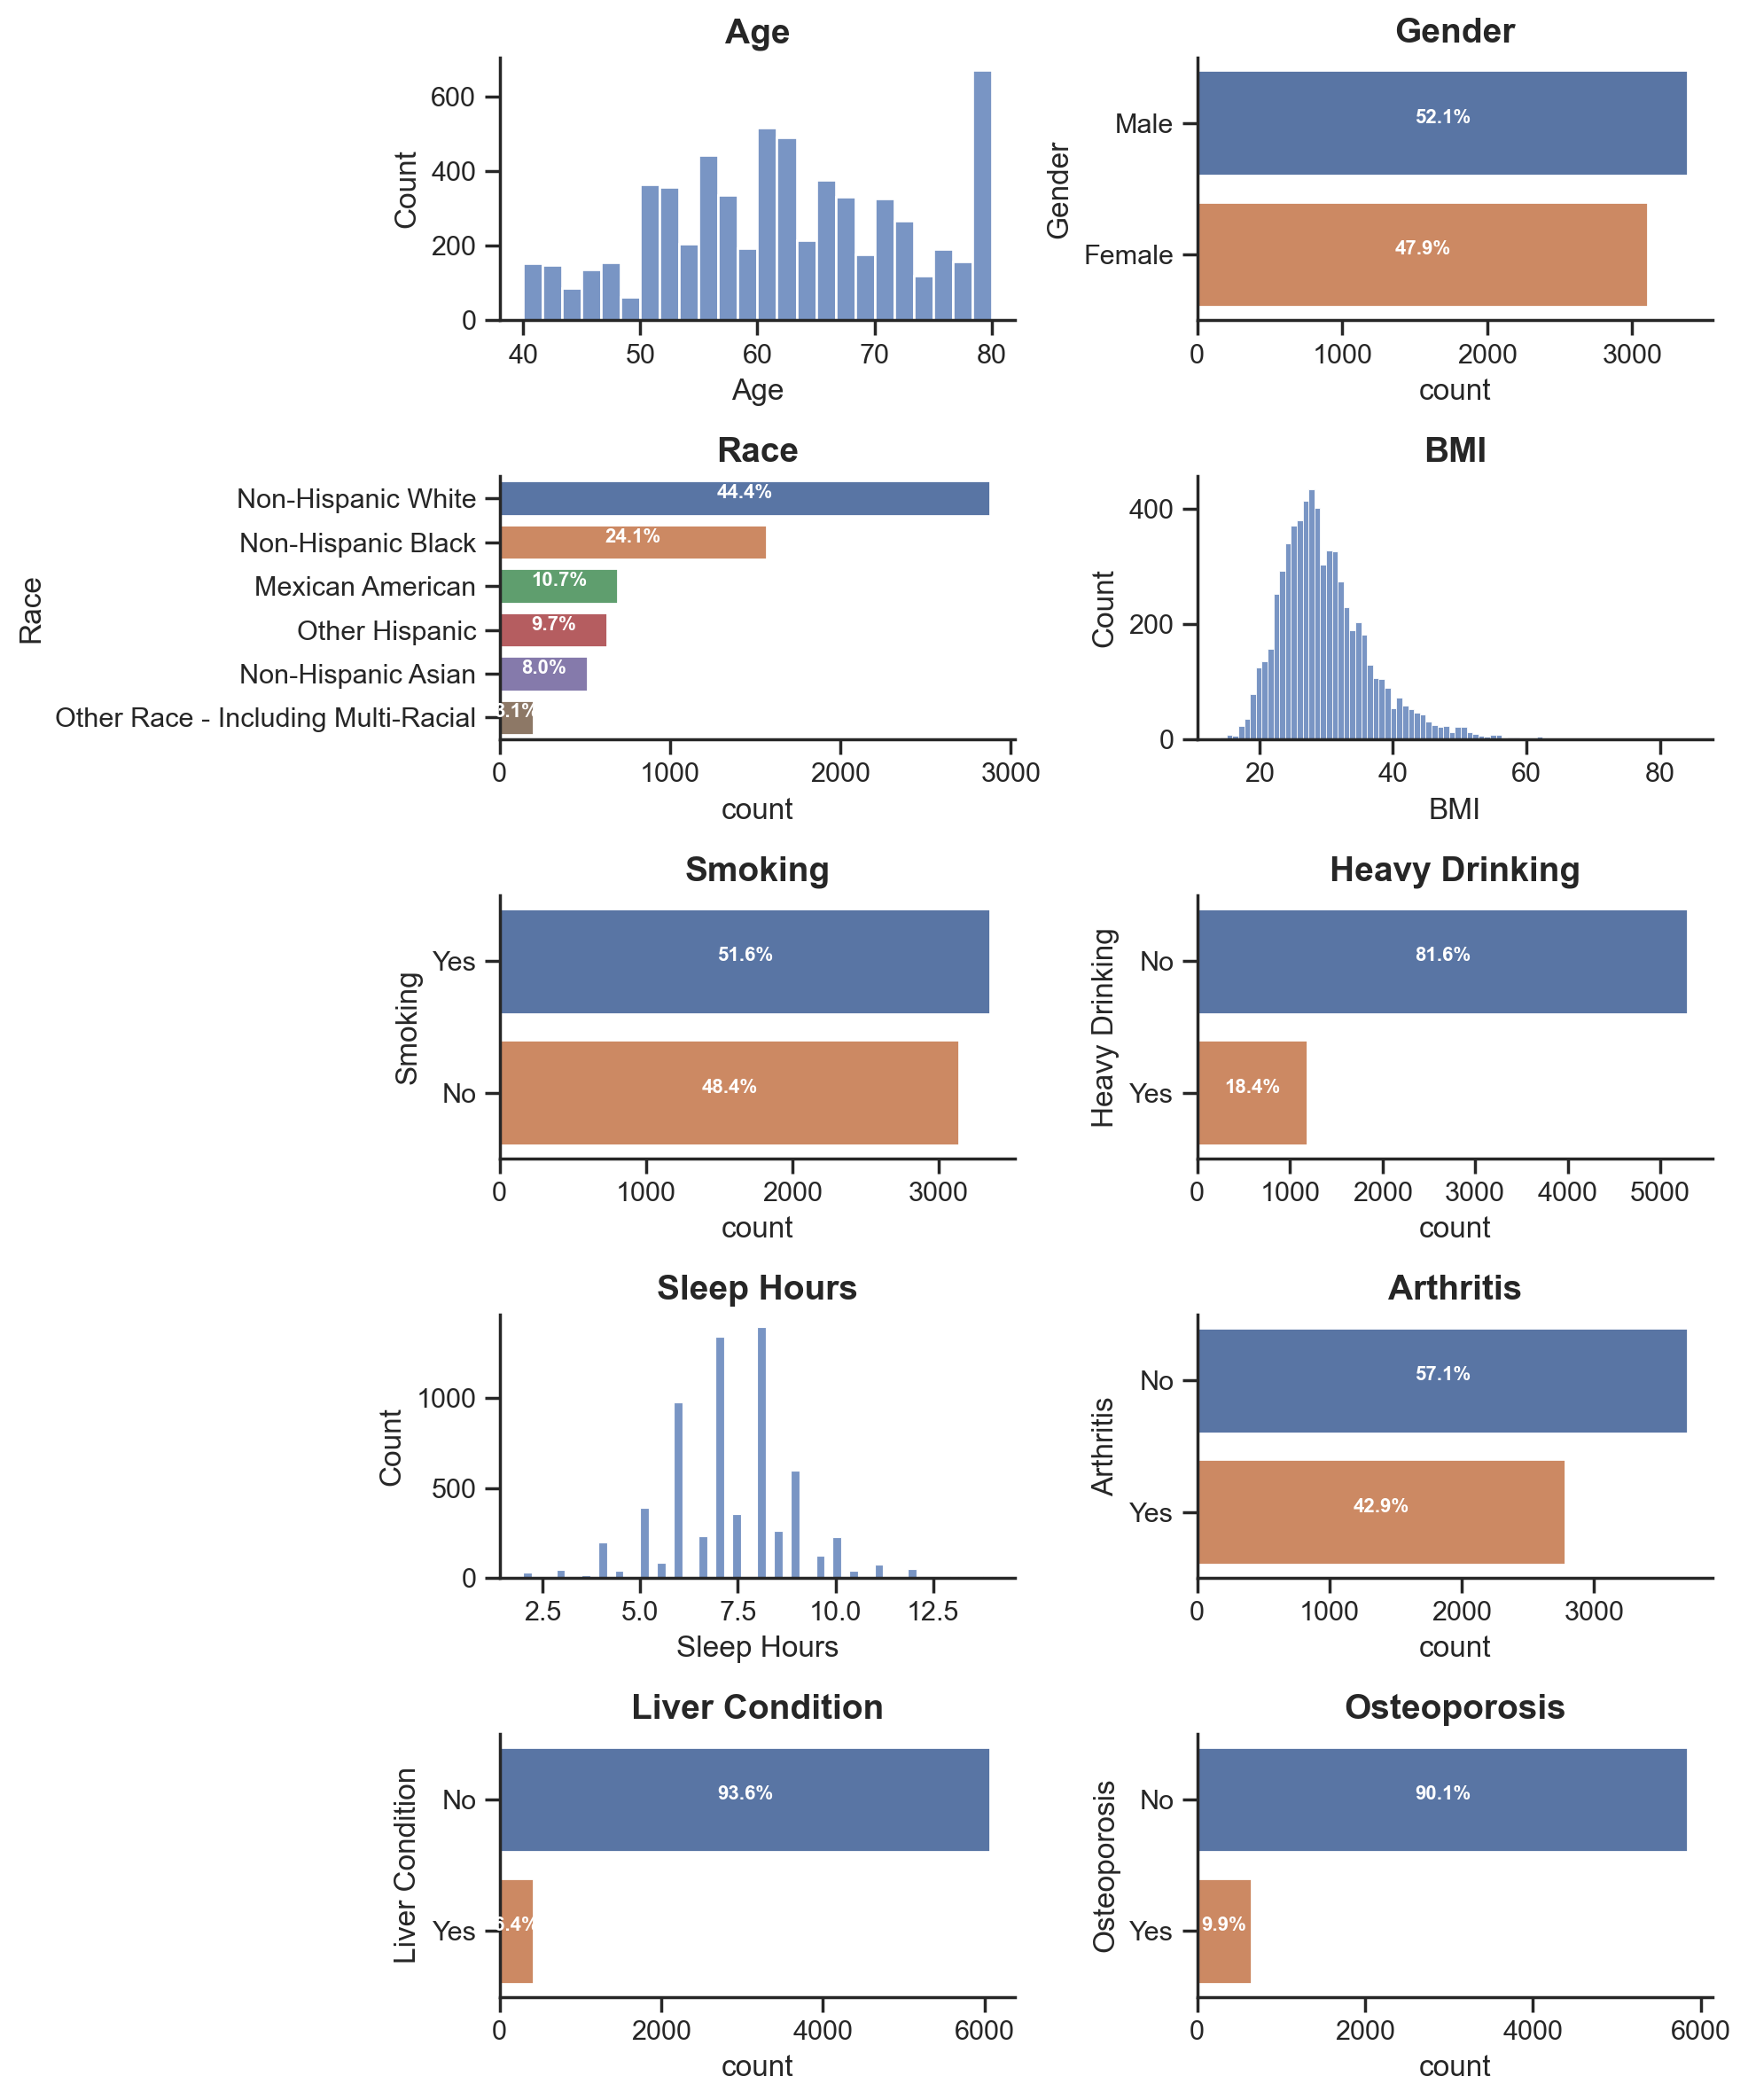

In [26]:
plt.figure(figsize=(10, 12))
multi_countplot(df_merged, var_list=df_merged.columns.tolist())

The dataset is highly imbalanced, the size of data with Osteoporosis vs. Non Osteoporosis is about 1:9, which may lead to lower sensitivity results in machine learning.

### 6.2 Osteoporosis by Gender

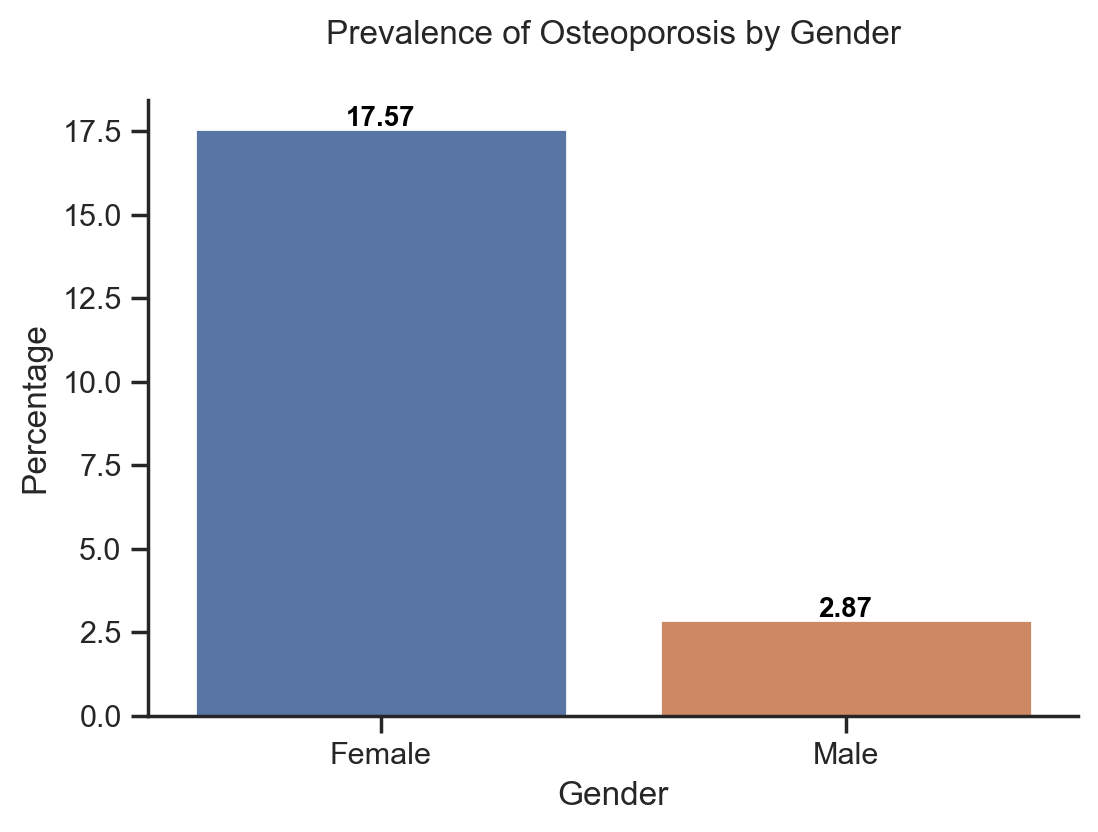

In [27]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged, 
                   var_col='Gender', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Gender')
plt.show()

Women are 6.1 times more likely to develop osteoporosis than men.

#### 95% Confidence Interval

In [28]:
# female vs male relative risk
df_oste_gender = (
                    df_merged.groupby(['Gender', 'Osteoporosis'])
                    .size()
                    .unstack()
                    .transpose()
                 )

# get 95% confidence interval of relative risk
ci_95= get_rr_ci(df_oste_gender, group1_name='Female', group2_name='Male')
print(f"95% confidence interval of relative risk (female vs male):\n {ci_95}")

95% confidence interval of relative risk (female vs male):
 [4.96731895 7.5661526 ]


Clearly, the result is statistically significant because the entire interval is higher than 1.
After accounting for sampling variability, the risk of getting osteoporosis for females was 5-7.6 times the risk for males.

### 6.3 Osteoporosis by Age

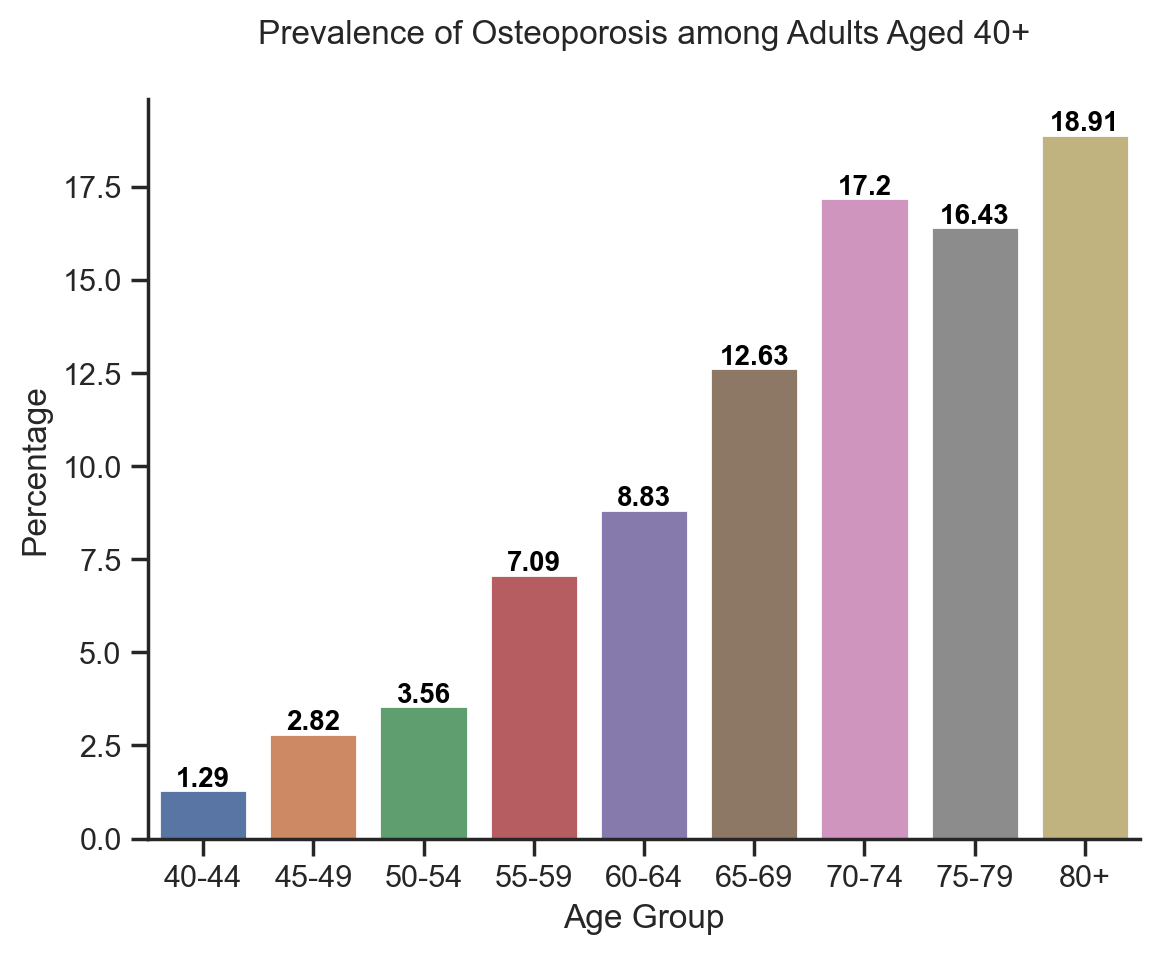

In [29]:
df_age_group = number_to_category(df_merged, var_col='Age', new_var_col='Age Group')
barplot_percentage(df_age_group, 
                   var_col='Age Group', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis among Adults Aged 40+')
plt.show()

Risk of osteoporosis rises with age. Any difference between female and male?

#### 6.3.1 Male vs. Female

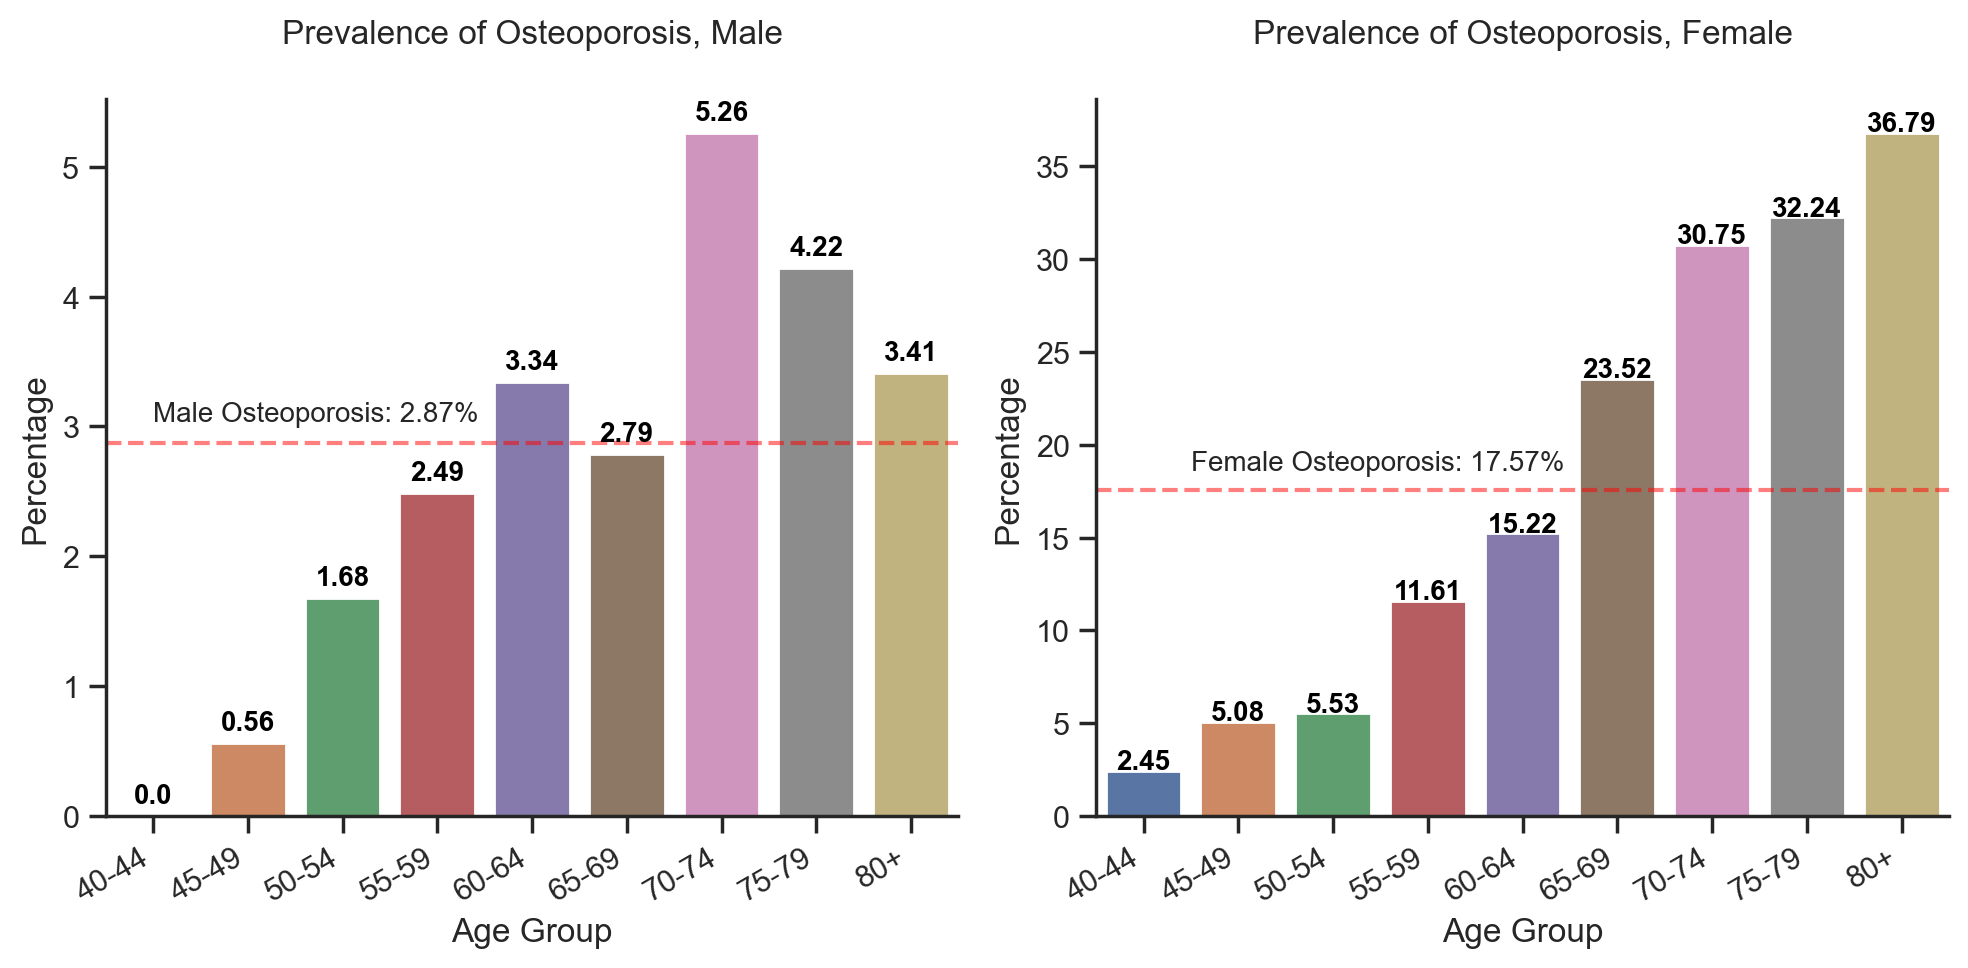

In [30]:
# get osteoporosis percentage by gender
df_gender_group = get_percentage(df_merged, var_col='Gender', target_col='Osteoporosis')
oste_pcnt_female = df_gender_group.loc[df_gender_group['Gender']=='Female', 'Percentage'].values[0]
oste_pcnt_male = df_gender_group.loc[df_gender_group['Gender']=='Male', 'Percentage'].values[0]


plt.figure(figsize=(10, 5))
plot_both_gender(data=df_age_group, 
                 var_col='Age Group', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male, 
                 text_female=oste_pcnt_female, 
                 annotate_x_male=0,
                 annotate_x_female=0.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=30
                )

Aging affected osteoporosis differently by sex.

After the age 65-69, the prevelance of Osteoporosis for women increased significantly. Women aged 80+ have the highest prevelance of 36.4%.

For men, there is no linear relationship between age and prevalence. The prevalence of osteoporosis decreased in 65-69 but then with the highest peak 5.3% at the age of 70-74. 

Let's compare 65-69 vs. 60-64 for men and women to check if the difference is statistically significant.

#### 6.3.2 95% Confidence Interval for Male

In [31]:
# 65-69 vs 60-64 for male
df_grouped = gender_groupby(data=df_age_group, gender='Male', 
                            var_col='Age Group', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='65-69', group2_name='60-64')
print(f"95% confidence interval of relative risk (65-69 vs 60-64) for male:\n {ci_95}")

95% confidence interval of relative risk (65-69 vs 60-64) for male:
 [0.42469503 1.63924595]


The confidence interval includes 1, it's not statistically significant.

#### 6.3.3 95% Confidence Interval for Female

In [32]:
# 65-69 vs 60-64 for female
df_grouped = gender_groupby(data=df_age_group, gender='Female', 
                            var_col='Age Group', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='65-69', group2_name='60-64')
print(f"95% confidence interval of relative risk (65-69 vs 60-64) for female:\n {ci_95}")

95% confidence interval of relative risk (65-69 vs 60-64) for female:
 [1.1913206  2.00344553]


The entire interval is greater than 1, so it's statistically significant.
The risk of getting osteoporosis for 65-69 females was 1.2-2 times the risk for 60-64 females.

### 6.4 Osteoporosis by Race

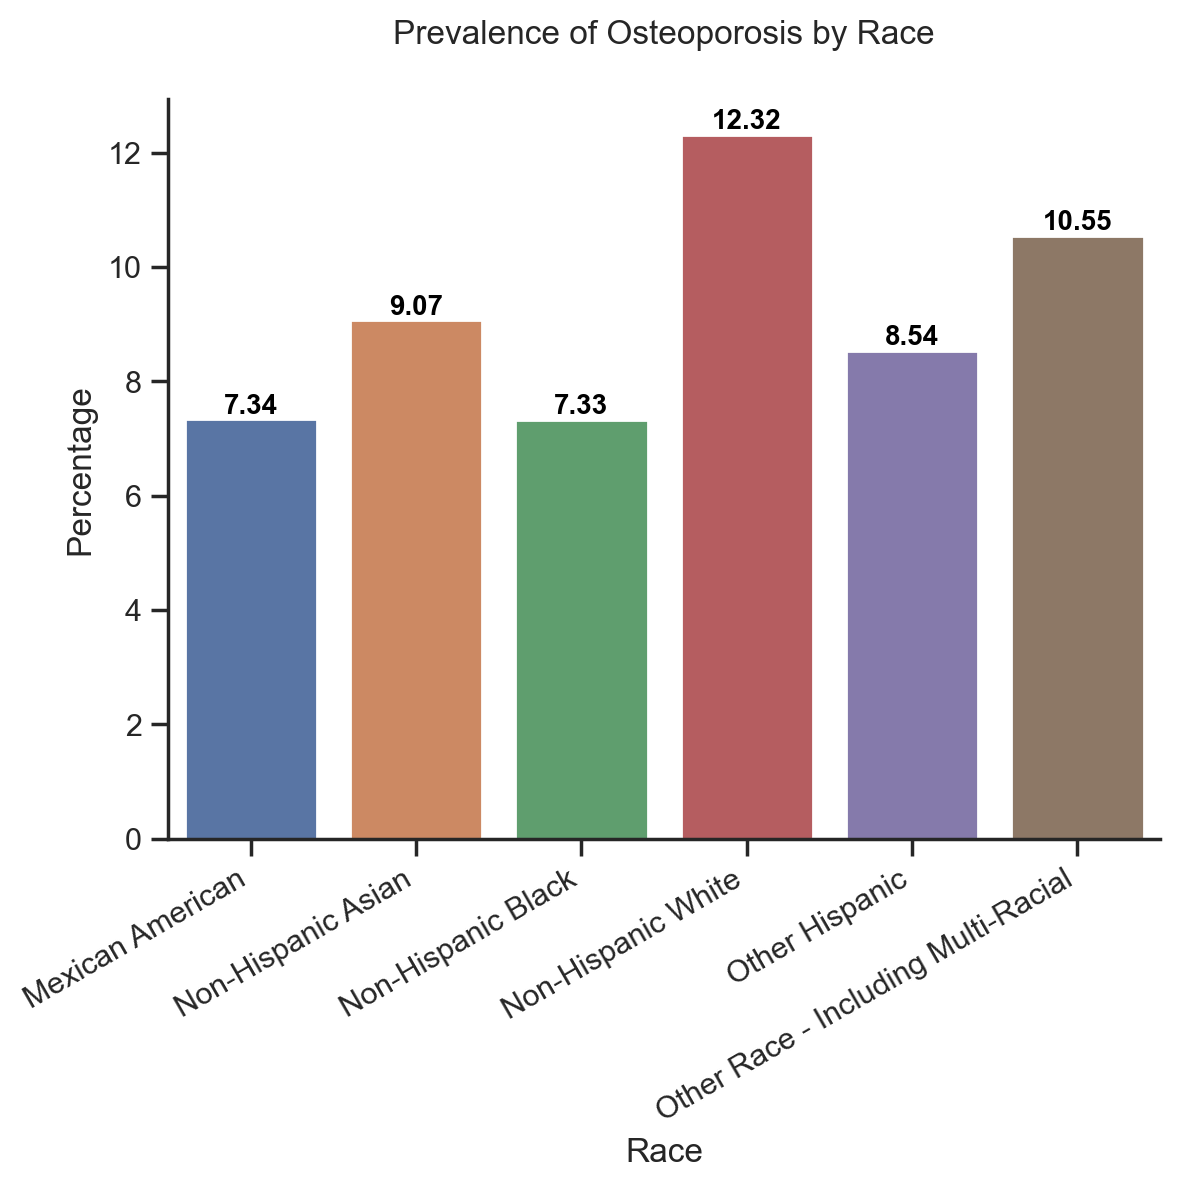

In [33]:
ax = barplot_percentage(df_merged, 
                   var_col='Race', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### 6.4.1 Male vs. Female

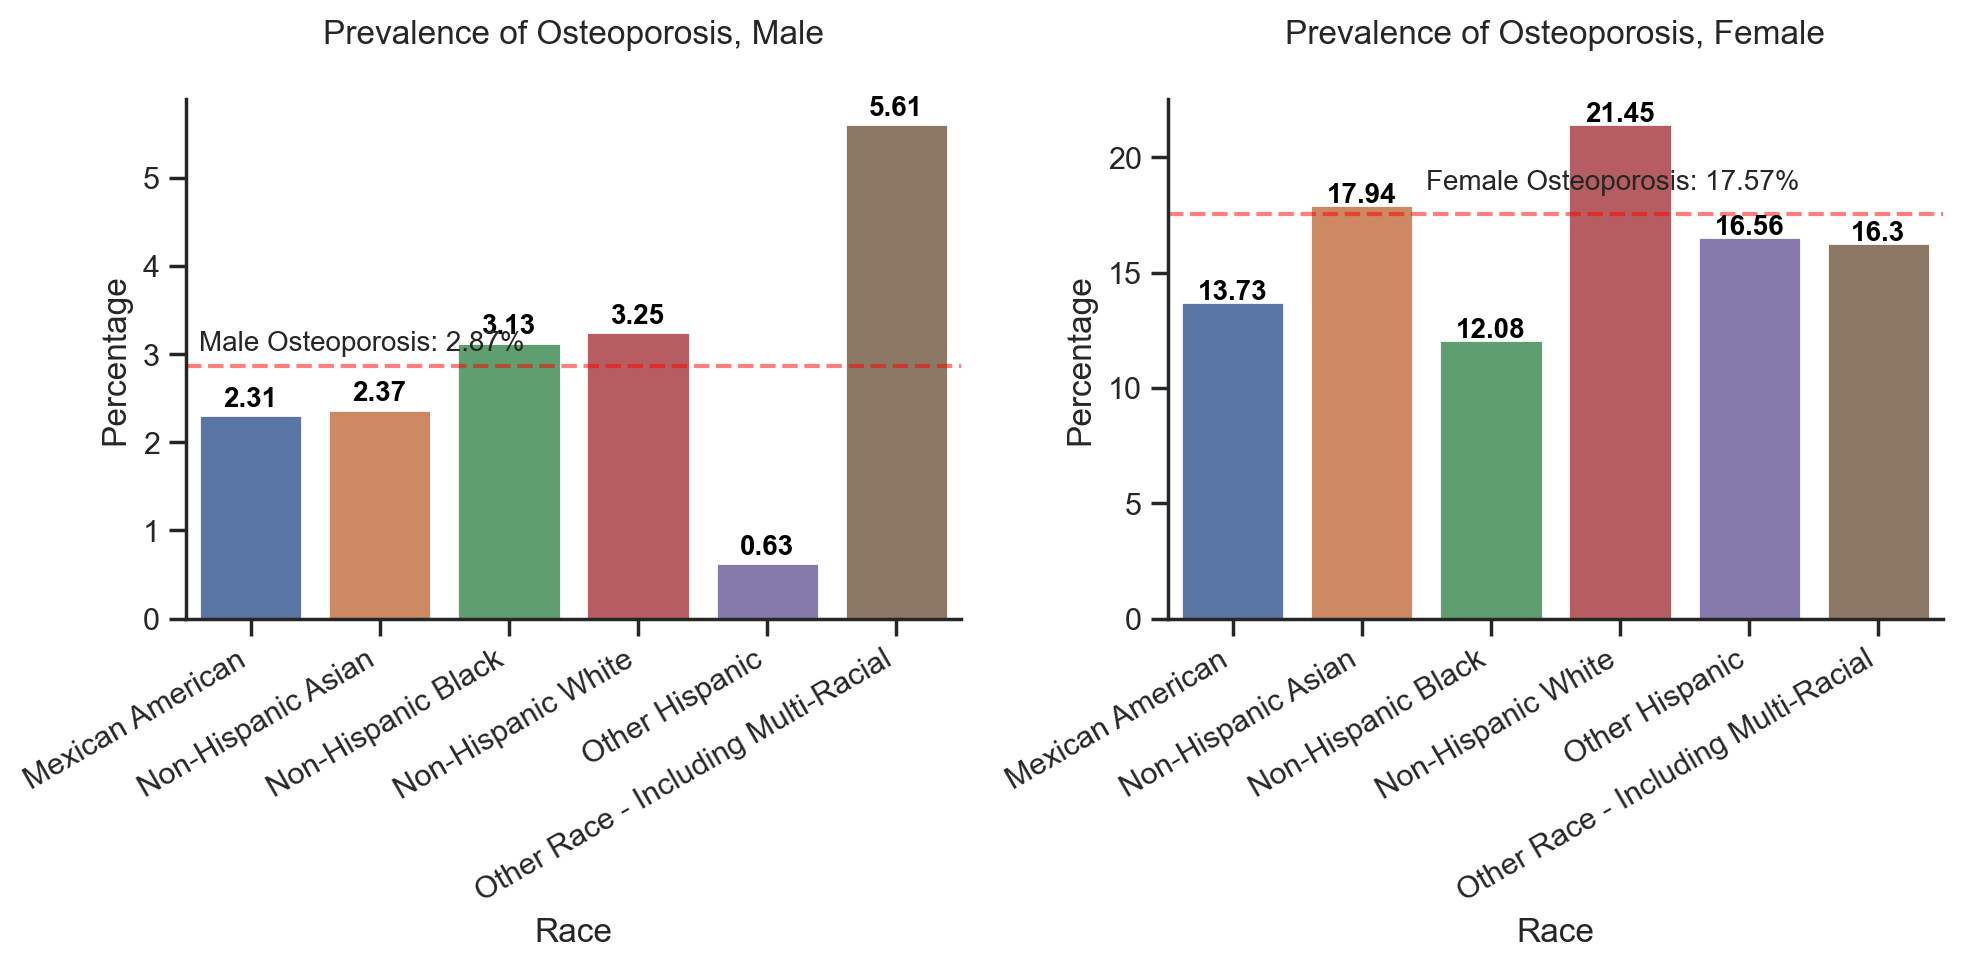

In [34]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Race', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.4,
                 annotate_x_female=1.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=30
                )

Osteoporosis prevalence differs among men and women by race. For men, "Other Race" had the highest prevalence, while for women, "Non-Hispanic White" had the highest prevalence.

If we set "Mexican American" as the reference group, "Non-Hispanic White" had higher risk for both men and women. Are the results statistically significant?

#### 6.4.2 95% Confidence Interval for Male

In [35]:
# Non-Hispanic White vs. Mexican American for male
df_grouped = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Race', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='Non-Hispanic White', group2_name='Mexican American')
print(f"95% confidence interval of relative risk (Non-Hispanic White vs Mexican American) for male:\n {ci_95}")

95% confidence interval of relative risk (Non-Hispanic White vs Mexican American) for male:
 [0.695122   2.84323772]


The confidence interval includes 1, it's not statistically significant. We cannot draw specific conclusion about the relative risk for these 2 races.

#### 6.4.3 95% Confidence Interval for Female

In [36]:
# Non-Hispanic White vs. Mexican American for female
df_grouped = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Race', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='Non-Hispanic White', group2_name='Mexican American')
print(f"95% confidence interval of relative risk (Non-Hispanic White vs Mexican American) for female:\n {ci_95}")

95% confidence interval of relative risk (Non-Hispanic White vs Mexican American) for female:
 [1.16015821 2.10484252]


The entire interval is greater than 1, it's statistically significant. The risk of getting osteoporosis for Non-Hispanic White females was 1.16-2.11 times the risk for Mexican American females.

### 6.5 Osteoporosis by BMI

According to [CDC](https://www.cdc.gov/obesity/basics/adult-defining.html), BMI can be interpreated to 4 groups: 
- Underweight (below 18.5)
- Healthy Weight (18.5 <= BMI < 25)
- Overweight (25.0 <= BMI < 30)
- Obesity (30.0 or higher)

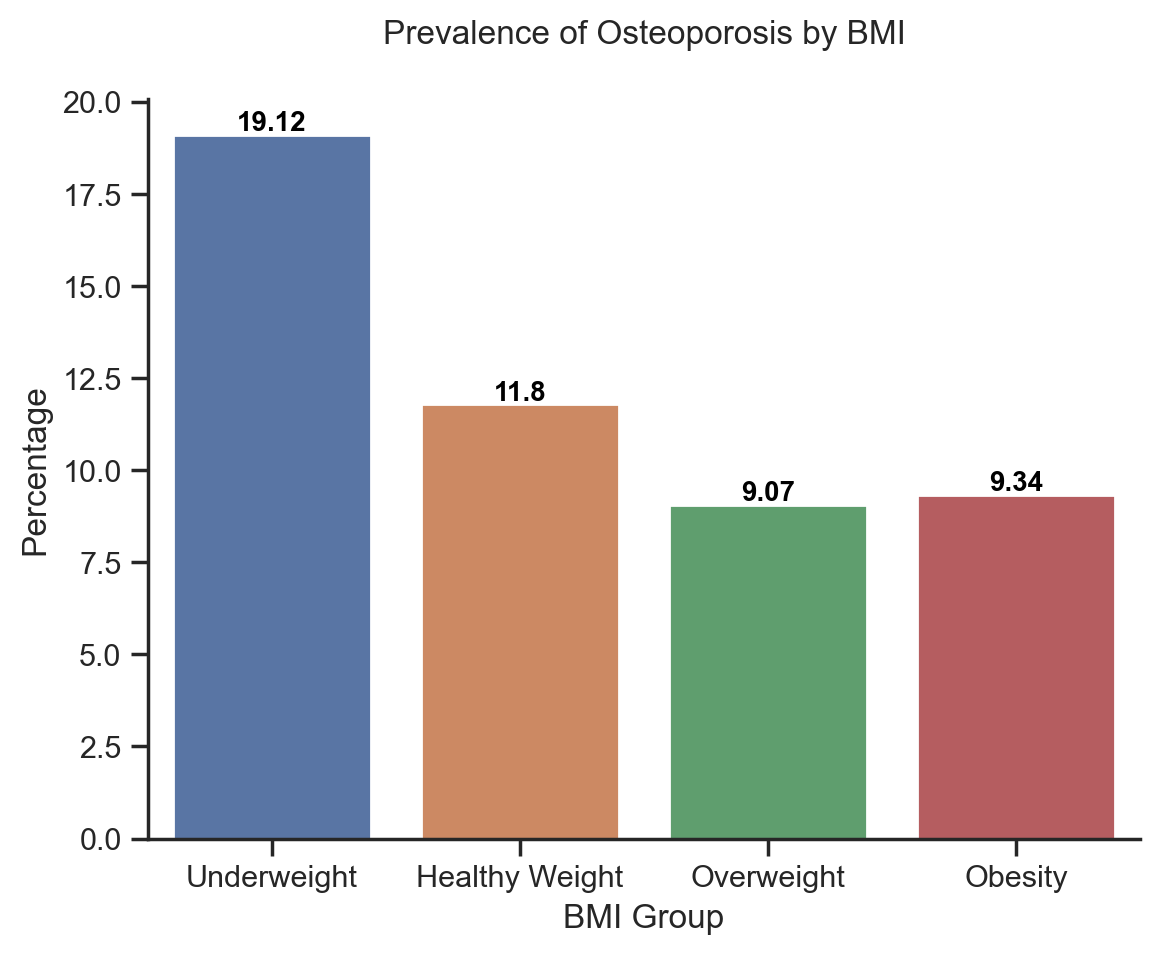

In [37]:
df_bmi_group = number_to_category(df_merged, var_col='BMI', new_var_col='BMI Group')
bmi_order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']
barplot_percentage(df_bmi_group,
                   var_col='BMI Group', 
                   target_col='Osteoporosis',
                   order = bmi_order,
                   title='Prevalence of Osteoporosis by BMI')
plt.show()

Osteoporosis was associated with underweight. Underweight people had 63% higher risk of Osteoporosis when compared to healthy weight people.

Again, let's check the difference by gender.
#### 6.5.1 Male vs. Female

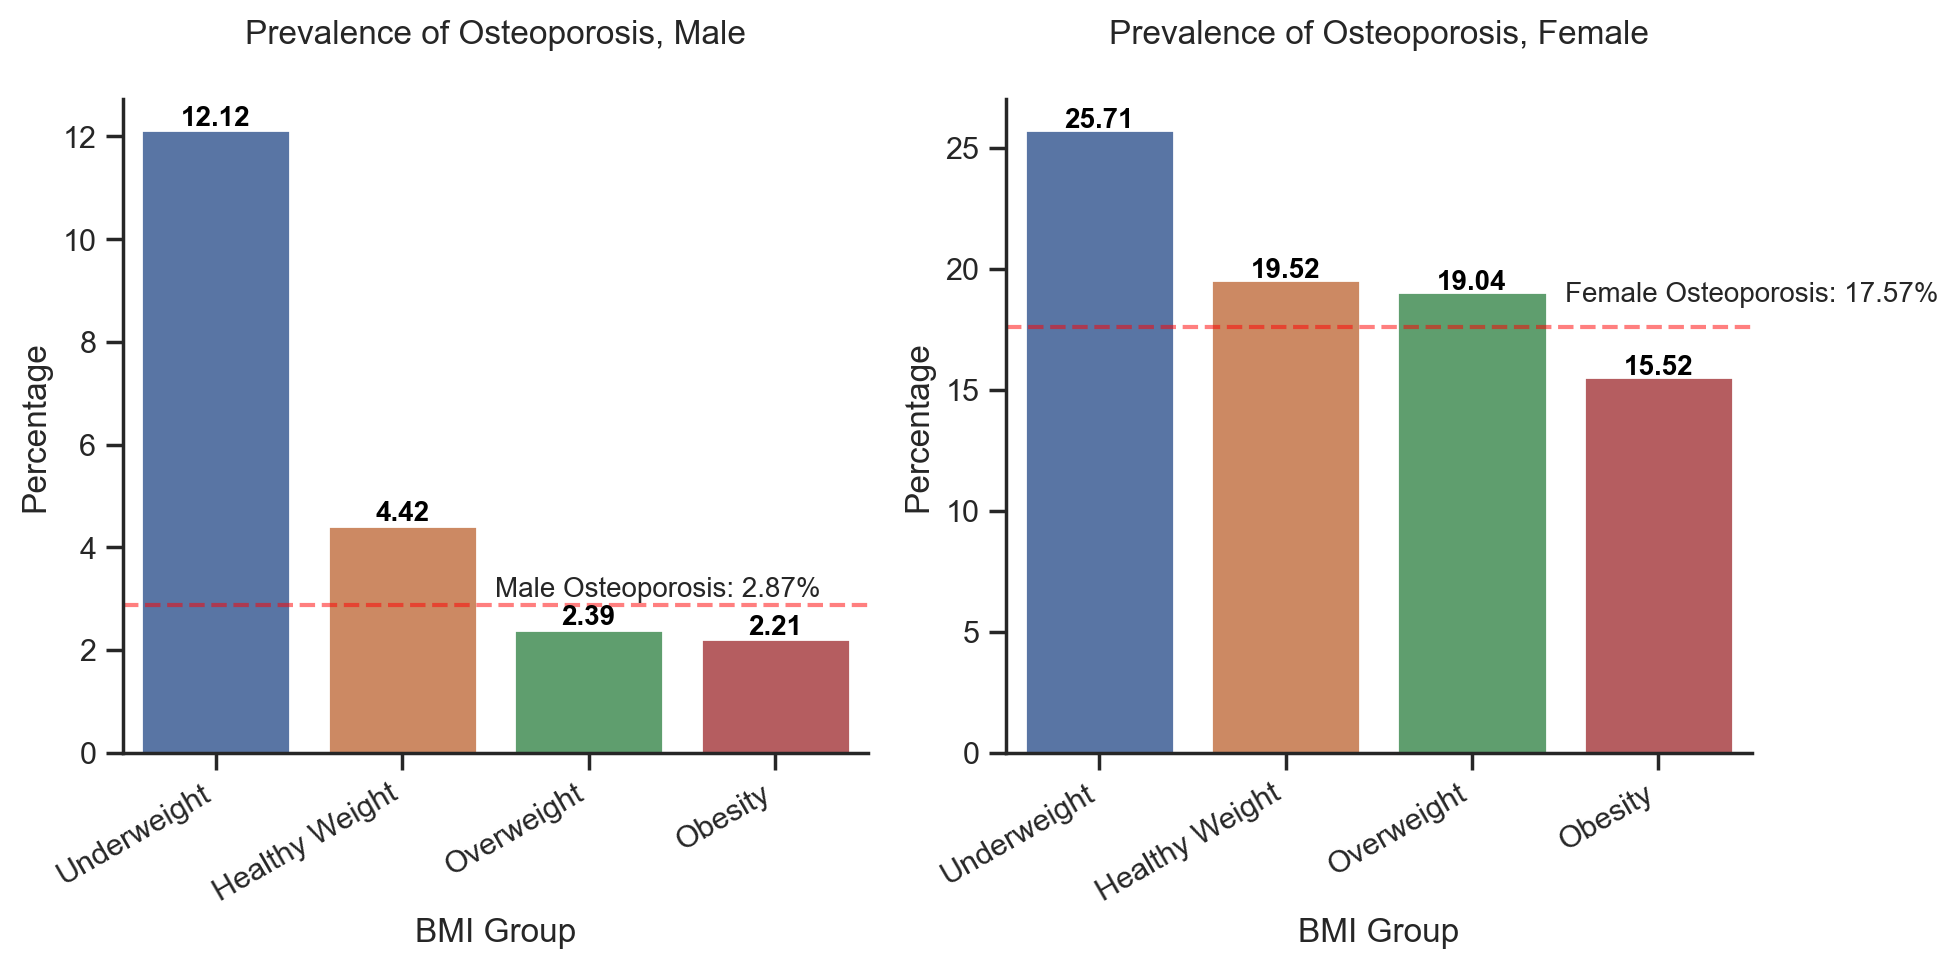

In [38]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_bmi_group, 
                 var_col='BMI Group', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=1.5,
                 annotate_x_female=2.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 order=bmi_order,
                 x_tick_rotation=30
                )

For both men and women, underweight respondents had higher prevalence of osteoporosis compared to healthy weight respondents. Interestingly, the prevalence of Osteoporosis tended to be lowest in obese people.
Are such results statistically significant?

#### 6.5.2 95% Confidence Interval for Male

**underweight vs. healthy weight**

In [39]:
# underweight vs. healthy weight for male
df_grouped_male = gender_groupby(data=df_bmi_group, gender='Male', 
                            var_col='BMI Group', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped_male, group1_name='Underweight', group2_name='Healthy Weight')
print(f"95% confidence interval of relative risk (underweight vs healthy weight) for male:\n {ci_95}")

95% confidence interval of relative risk (underweight vs healthy weight) for male:
 [1.03110982 7.28176998]


The entire interval is greater than 1, so it's statistically significant. The risk of getting osteoporosis for underweight males was 1.03-7.3 times the risk for healthy weighted males.

**obesity vs. healthy weight**

In [40]:
# obesity vs. healthy weight for male
ci_95 = get_rr_ci(df_grouped_male, group1_name='Obesity', group2_name='Healthy Weight')
print(f"95% confidence interval of relative risk (obesity vs healthy weight) for male:\n {ci_95}")

95% confidence interval of relative risk (obesity vs healthy weight) for male:
 [0.30440567 0.81989809]


The entire interval is smaller than 1, so it's statistically significant. The risk of getting osteoporosis for obese males was 0.3-0.8 times the risk for healthy weighted males.

#### 6.5.3 95% Confidence Interval for Female
**underweight vs. healthy weight**

In [41]:
# underweight vs. healthy weight for female
df_grouped_female = gender_groupby(data=df_bmi_group, gender='Female', 
                            var_col='BMI Group', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped_female, group1_name='Underweight', group2_name='Healthy Weight')
print(f"95% confidence interval of relative risk (underweight vs healthy weight) for female:\n {ci_95}")

95% confidence interval of relative risk (underweight vs healthy weight) for female:
 [0.73562356 2.35843378]


The 95% confidence interval of relative risk includes 1, the result is not statistically significant. We cannot get any conclusion about how underweight affect osteoporosis for females for now.

**obesity vs. healthy weight**

In [42]:
# obesity vs. healthy weight for female
ci_95 = get_rr_ci(df_grouped_female, group1_name='Obesity', group2_name='Healthy Weight')
print(f"95% confidence interval of relative risk (obesity vs healthy weight) for female:\n {ci_95}")

95% confidence interval of relative risk (obesity vs healthy weight) for female:
 [0.65649299 0.96219558]


The entire interval is smaller than 1, so it's statistically significant. The risk of getting osteoporosis for obese females was 0.66-0.96 times the risk for healthy weighted males.

### 6.6 Osteoporosis by Alcohol

Alcohol data on "Heavy Drinking" are answers to the question "Ever have 4/5 or more drinks every day". According to the [National Institute on Alcohol Abuse and Alcoholism](https://www.niaaa.nih.gov/alcohol-health/overview-alcohol-consumption/moderate-binge-drinking), heavy drinking is defined as consuming more than 4 drinks on any day for men, or consuming more than 3 drinks on any day or women.

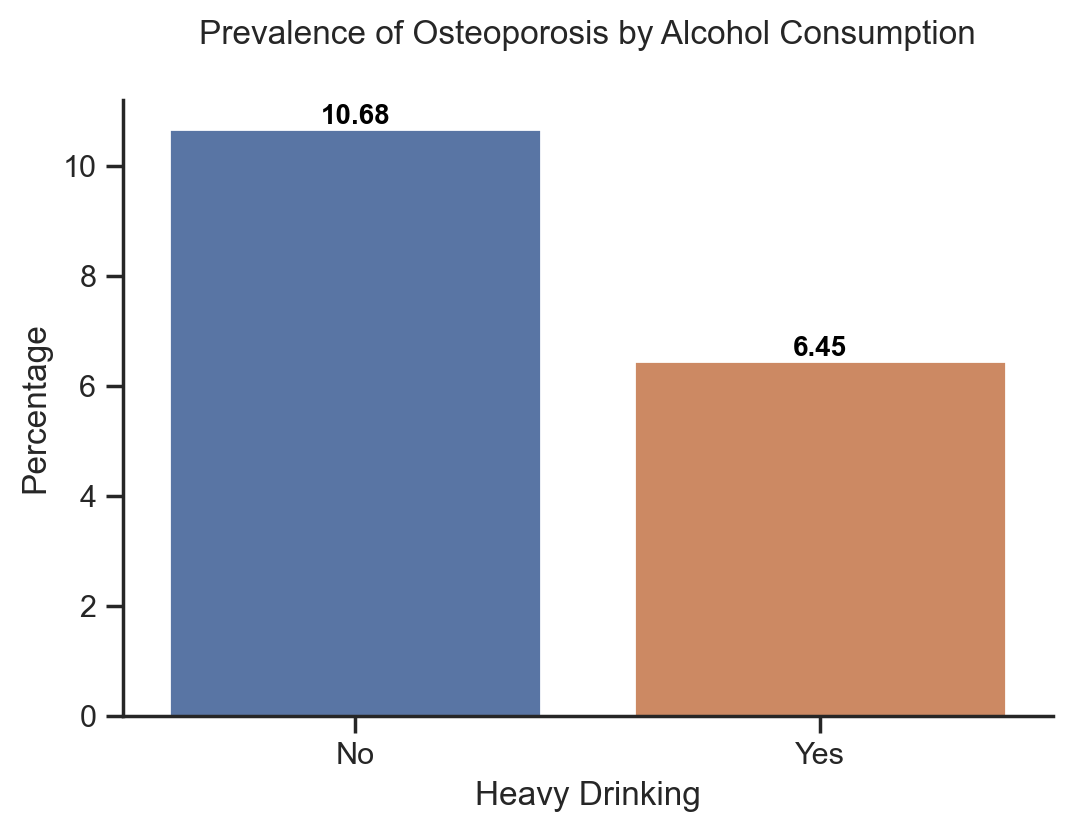

In [43]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Heavy Drinking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Alcohol Consumption'
                  )
plt.show()

The risk of getting osteoporosis for people who never had 4/5 or more drinks every day was 1.65 times the risk for those who ever had. This result is somewhat inconsistent with the common sense that alcohol is harmful to bone health. Why? Did heavy alcohol use affect men and women differently?


#### 6.6.1 Male vs. Female

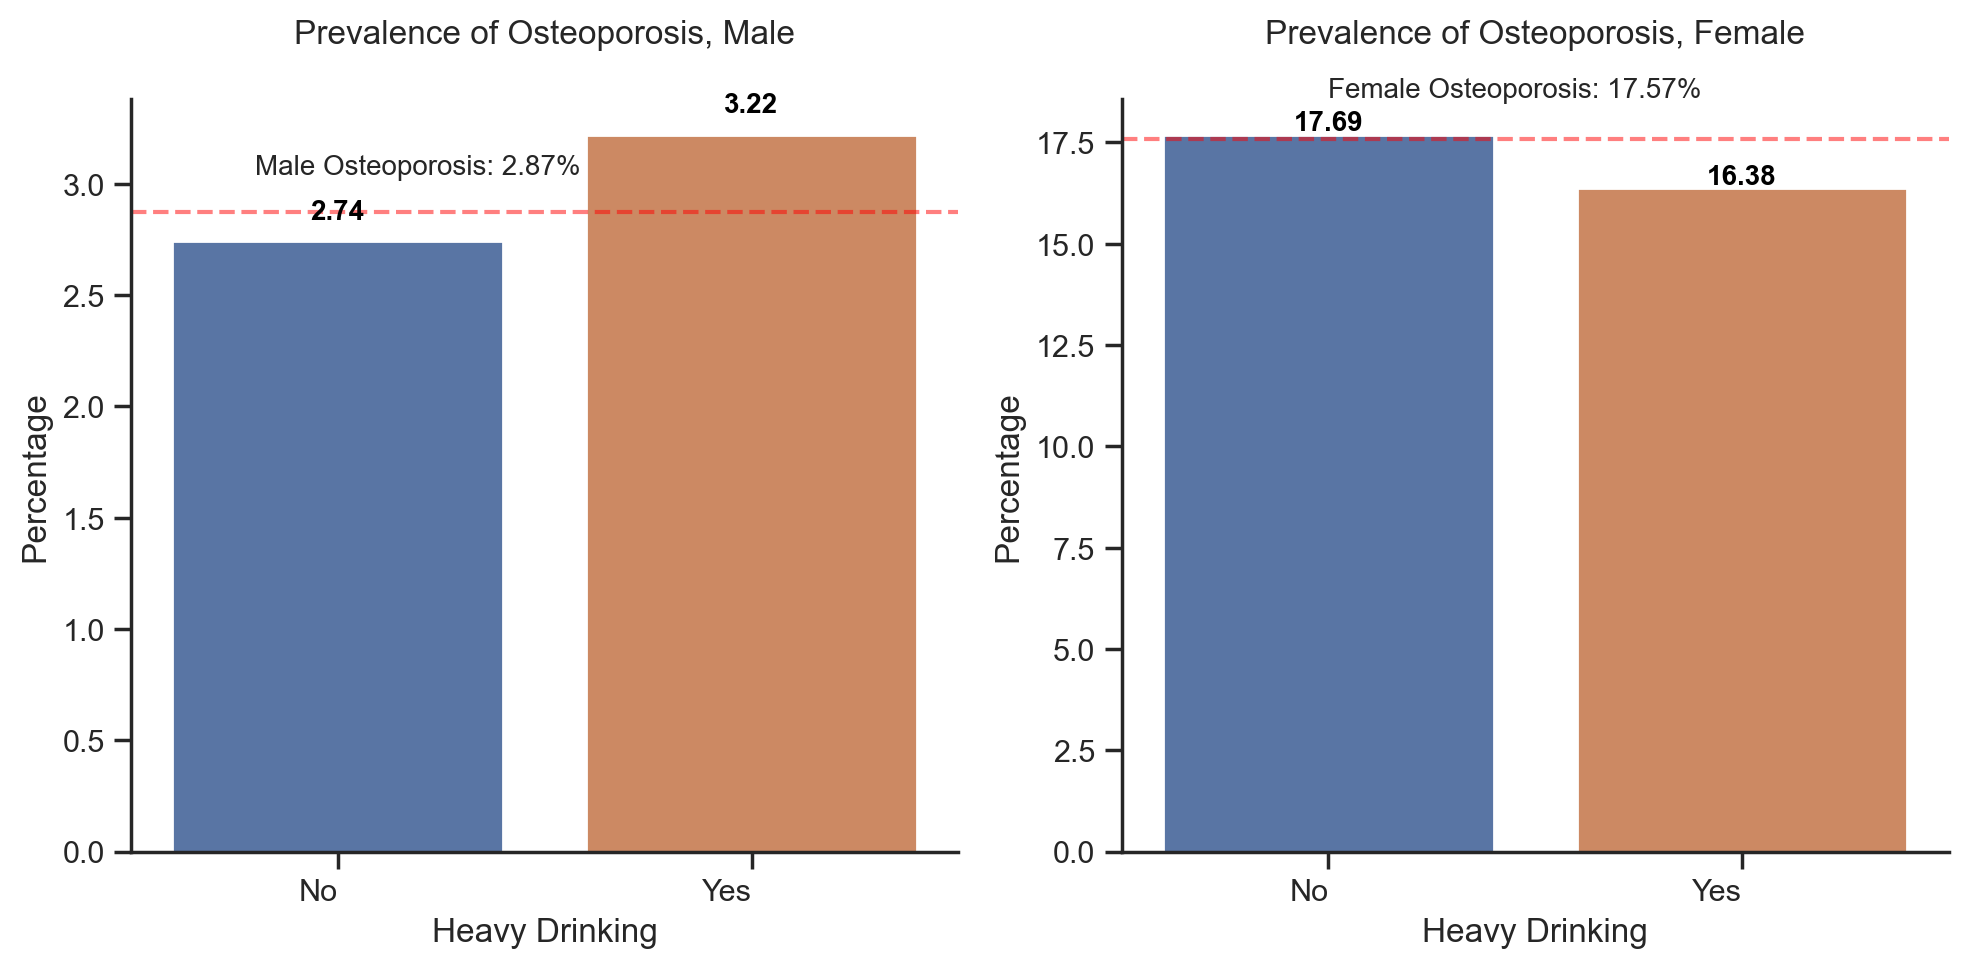

In [44]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Heavy Drinking', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=0,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

According to the chart for male, male respondents who ever drank heavily had 18% higher risk of osteoporosis when compared to those who never did so. While women were just the opposite, those who ever drank heavily had 7% lower risk of osteoporosis.

But neither 18% nor 7% sounds big enough. Are these results statistically significant?

#### 6.6.2 95% Confidence Interval for Male

Get the 95% confidence interval for male:

In [45]:
# never vs ever had heavy alcohol drinking for male
df_grouped = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Heavy Drinking', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='No', group2_name='Yes')
print(
f"""
95% confidence interval of relative risk (no heavy drinking vs heavy drinking) \
for male:\n {ci_95}
""")


95% confidence interval of relative risk (no heavy drinking vs heavy drinking) for male:
 [0.55356279 1.30282826]



The 95% confidence interval of relative risk includes 1, the result is not statistically significant.

#### 6.6.3 95% Confidence Interval for Female

Next, let's calculate the 95% confidence interval for female:

In [46]:
# never vs ever had heavy alcohol drinking for female
df_grouped = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Heavy Drinking', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='No', group2_name='Yes')
print(
f"""
95% confidence interval of relative risk (no heavy drinking vs heavy drinking) \
for female:\n {ci_95}
""")


95% confidence interval of relative risk (no heavy drinking vs heavy drinking) for female:
 [0.8237956 1.4155825]



Likewise, the 95% confidence interval of relative risk includes 1, we fail to reject the null hypothesis that the two risks are equal, the result is not statistically significant.

In summary, we cannot draw any specific conclusions about how smoking affects osteoporosis. More detailed data is needed for further analysis.

### 6.7 Osteoporosis by Smoking

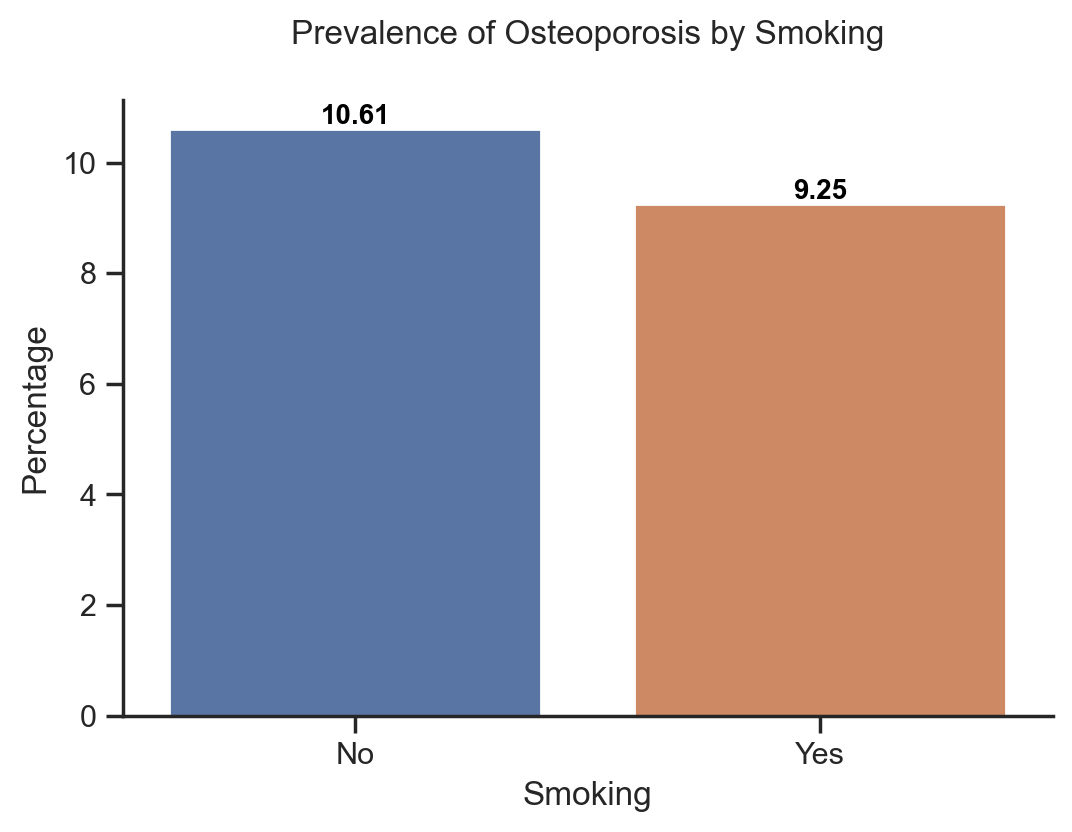

In [47]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Smoking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Smoking'
                  )
plt.show()

The risk for people who didn't smoke was 1.1 times the risk for those who smoked.

But it makes more sense to check the relative risk by gender.


#### 6.7.1 Male vs. Female

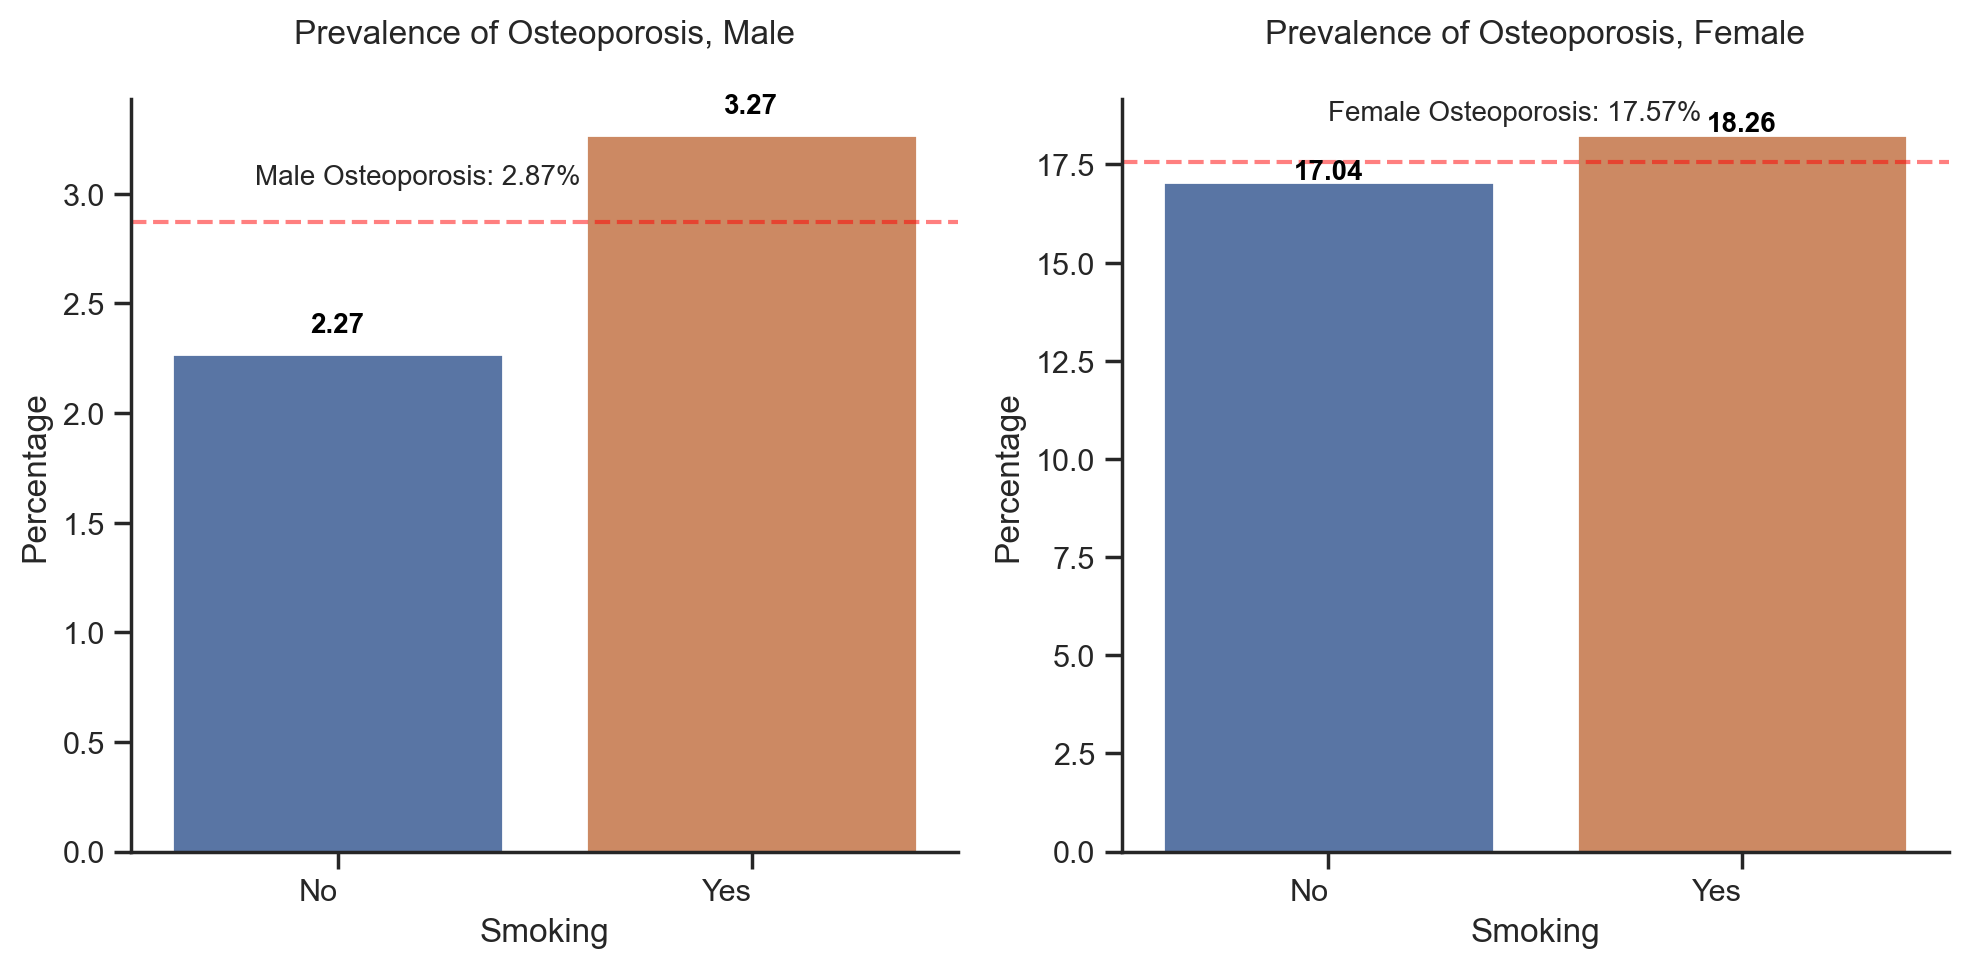

In [48]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Smoking', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=0,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

According to charts, men who smoke had 44% higher risk of osteoporosis when compared to those who didn't smoke. Same trend for women, those who smoke had 7% higher risk when compared to those who didn't smoke.

Next, let' check if these results are statistically significant.

#### 6.7.2 95% Confidence Interval for Male

In [49]:
df_grouped = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Smoking', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='No', group2_name='Yes')
print(
f"""
95% confidence interval of relative risk (no smoking vs smoking) \
for male:\n {ci_95}
""")


95% confidence interval of relative risk (no smoking vs smoking) for male:
 [0.4544744  1.05527511]



The interval includes 1, it's not statistically significant.

#### 6.7.3 95% Confidence Interval for Female

In [50]:
df_grouped = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Smoking', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='No', group2_name='Yes')
print(
f"""
95% confidence interval of relative risk (no smoking vs smoking) \
for female:\n {ci_95}
""")


95% confidence interval of relative risk (no smoking vs smoking) for female:
 [0.80074679 1.08748808]



Similarly, the confidence interval for female also includes 1, it's not statistically significant.

In summary, we cannot get specific coonclusion about how smoking impact osteoporosis in this project. Further research is needed.

### 6.8 Osteoporosis by Sleep Hours

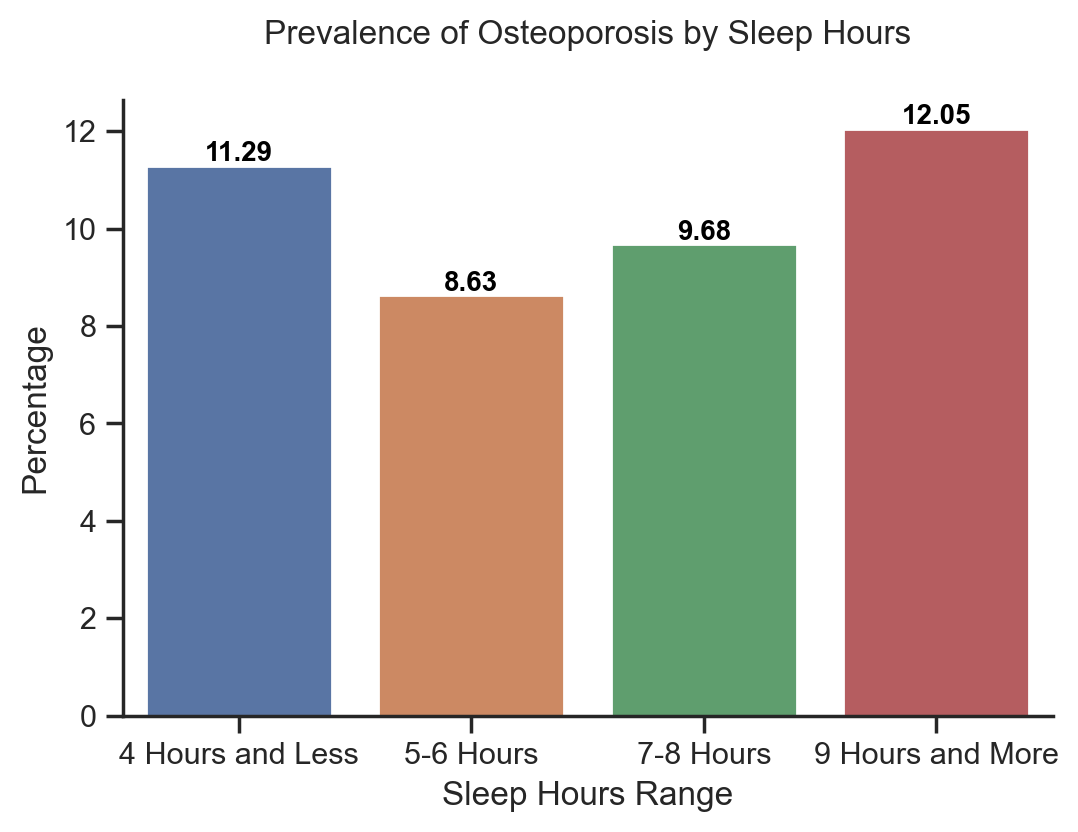

In [51]:
df_sleep_group = number_to_category(df_merged, var_col='Sleep Hours', new_var_col='Sleep Hours Range')
sleep_order = ['4 Hours and Less', '5-6 Hours', '7-8 Hours', '9 Hours and More']
plt.figure(figsize=(6, 4))
barplot_percentage(df_sleep_group, 
                   var_col='Sleep Hours Range', 
                   target_col='Osteoporosis',
                   order = sleep_order,
                   title='Prevalence of Osteoporosis by Sleep Hours')
plt.show()

#### 6.8.1 Male vs. Female

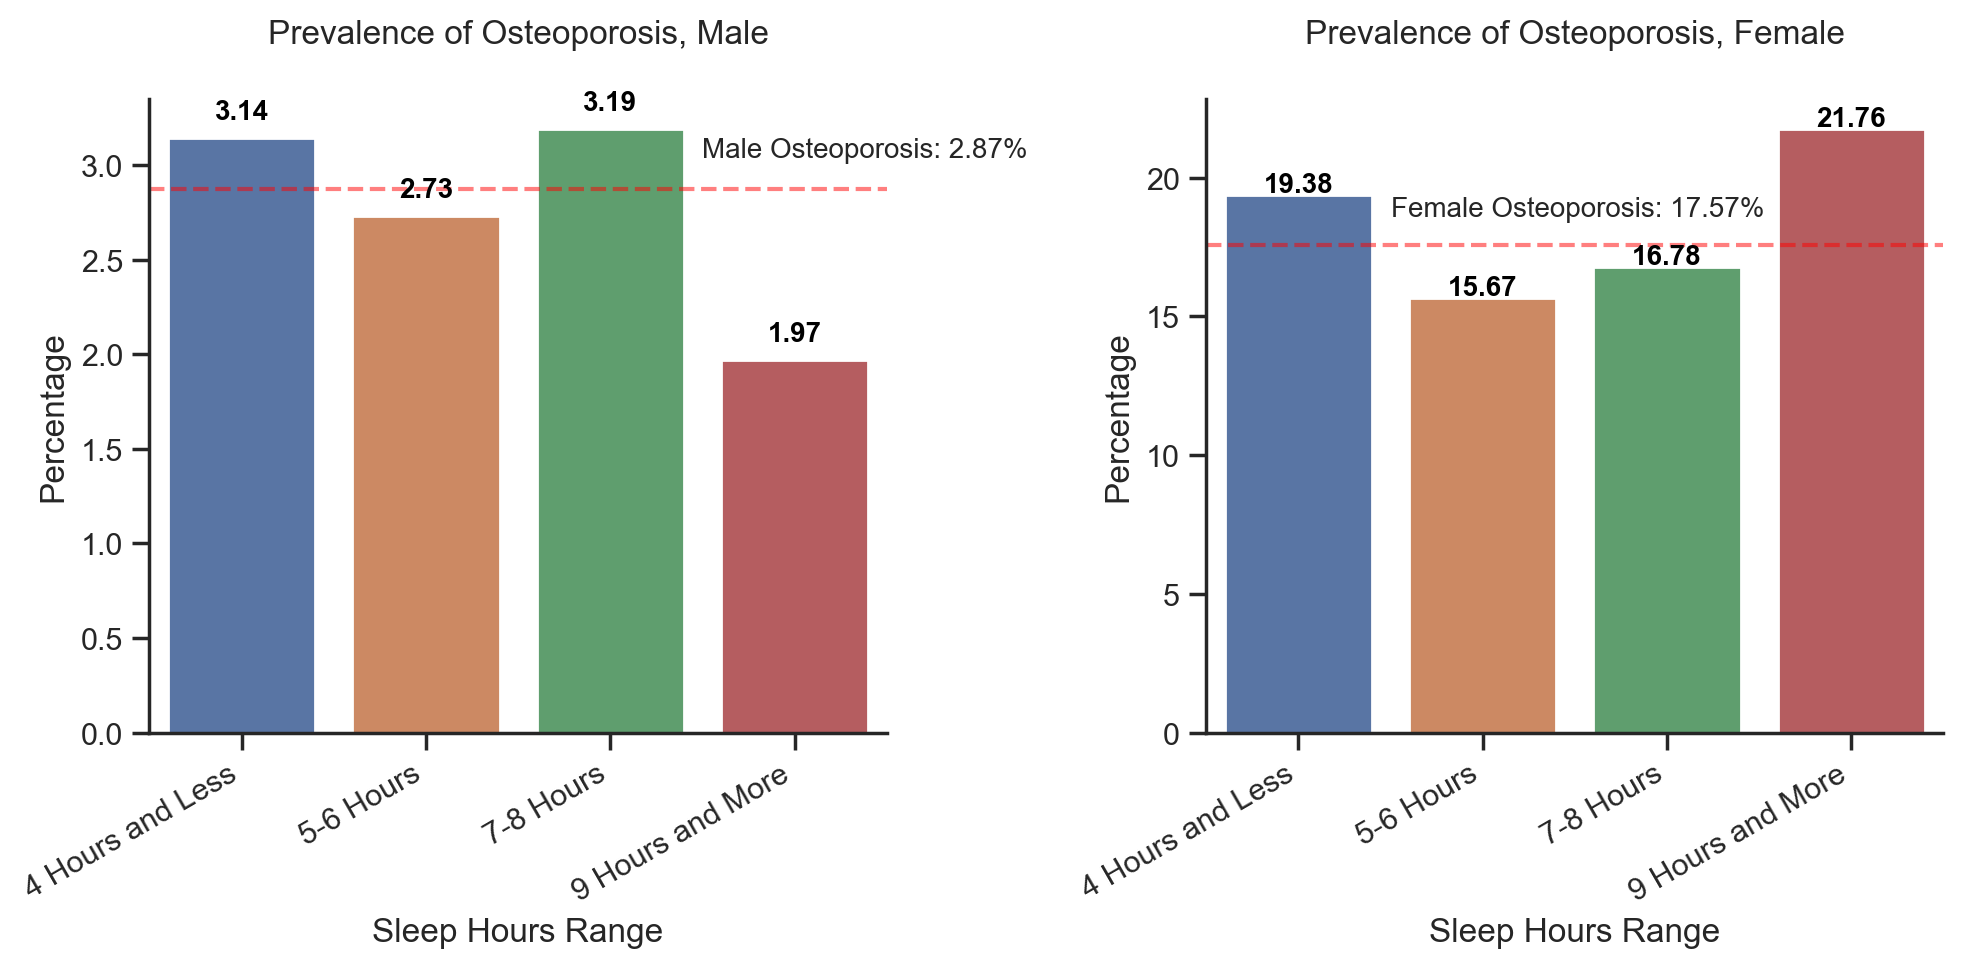

In [52]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_sleep_group, 
                 var_col='Sleep Hours Range', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=2.5,
                 annotate_x_female=0.5,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 order = sleep_order,
                 x_tick_rotation=30
                )

Sleep hours affected men and women differently, but non-linearly. For both men and women, 5-6 sleep hours were associated with lower prevalence of osteoporosis than 4 hours and less. Let's check if the relative risks are statistically significant.

#### 6.8.2 95% Confidence Interval for Male

In [53]:
# 4 hours and less vs. 5-6 hours for male
df_grouped = gender_groupby(data=df_sleep_group, gender='Male', 
                            var_col='Sleep Hours Range', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='4 Hours and Less', group2_name='5-6 Hours')
print(f"95% confidence interval of relative risk (4 and less vs 5-6) for male:\n {ci_95}")

95% confidence interval of relative risk (4 and less vs 5-6) for male:
 [0.44720633 2.96210186]


The interval includes 1, it's not statistically significant.

#### 6.8.3 95% Confidence Interval for Female

In [54]:
# 4 hours and less vs. 5-6 hours for female
df_grouped = gender_groupby(data=df_sleep_group, gender='Female', 
                            var_col='Sleep Hours Range', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='4 Hours and Less', group2_name='5-6 Hours')
print(f"95% confidence interval of relative risk (4 and less vs 5-6) for female:\n {ci_95}")

95% confidence interval of relative risk (4 and less vs 5-6) for female:
 [0.86611155 1.76605668]


The interval also includes 1, it's not statistically significant.

In summary, we cannot draw any specific conclusions about how sleep hours affects osteoporosis. Further study is required.

### 6.9 By Arthritis

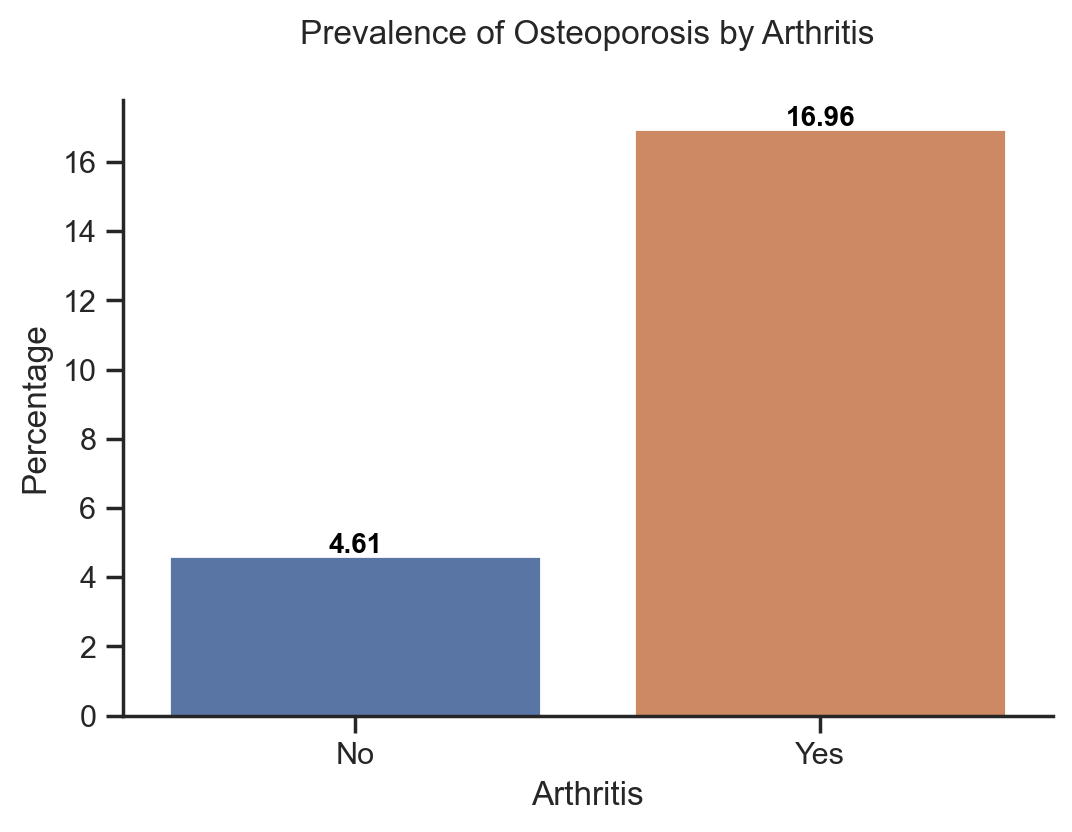

In [55]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Arthritis',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Arthritis'
                  )
plt.show()

#### 6.9.1 Male vs. Female

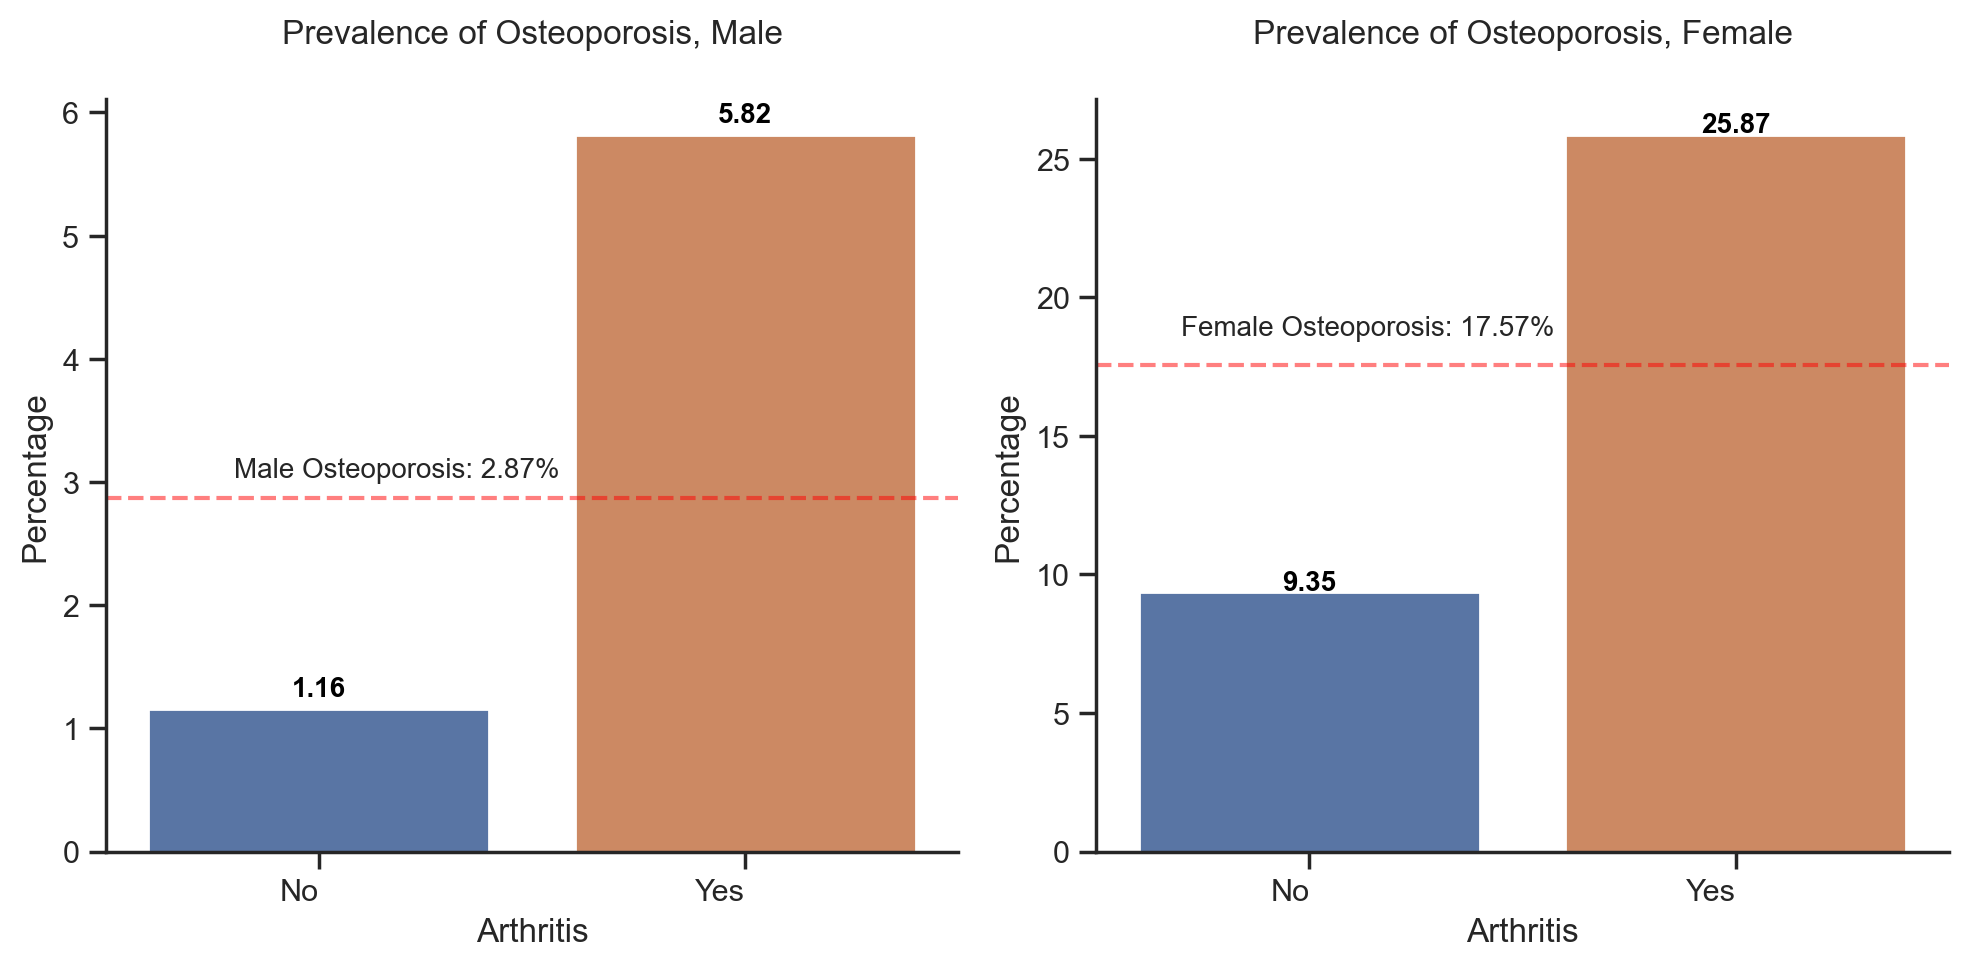

In [56]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Arthritis', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=-0.3,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

#### 6.9.2 95% Confidence Interval for Male

In [57]:
# with arthritis vs.no arthritis for male
df_grouped = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Arthritis', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='Yes', group2_name='No')
print(
f"""
95% confidence interval of relative risk (with arthritis vs.no arthritis)\
for male:\n {ci_95}
""")


95% confidence interval of relative risk (with arthritis vs.no arthritis)for male:
 [3.19010763 7.8398688 ]



The entire interval is greater than 1, so it's statistically significant.

#### 6.9.3 95% Confidence Interval for Female

In [58]:
# with arthritis vs.no arthritis for female
df_grouped = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Arthritis', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='Yes', group2_name='No')
print(
f"""
95% confidence interval of relative risk (with arthritis vs.no arthritis)\
for female:\n {ci_95}
""")


95% confidence interval of relative risk (with arthritis vs.no arthritis)for female:
 [2.3213879  3.30072722]



Again, the entire interval is greater than 1 and therefore the result is statistically significant.

In summary, for both men and women, people with arthritis had higher risk of osteoporosis when compared to those without arthritis.

### 6.10 By Liver Condition

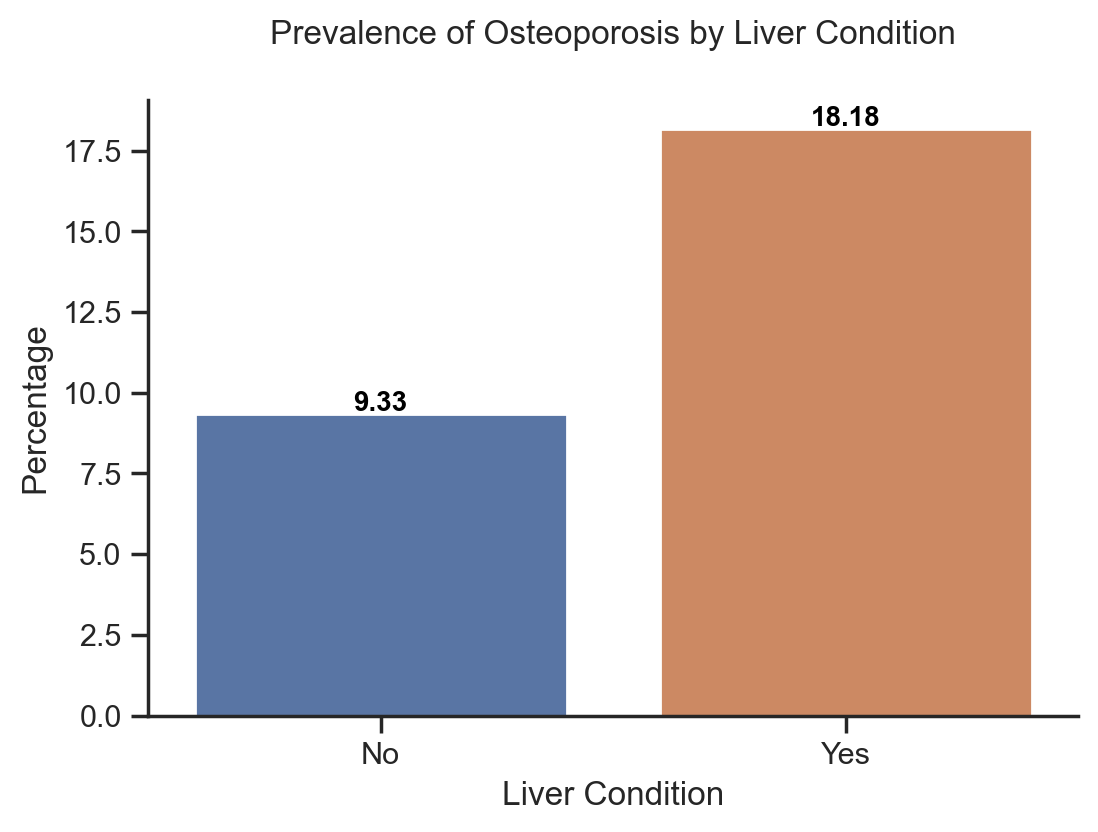

In [59]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Liver Condition',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Liver Condition'
                  )
plt.show()

#### 6.10.1 Male vs. Female

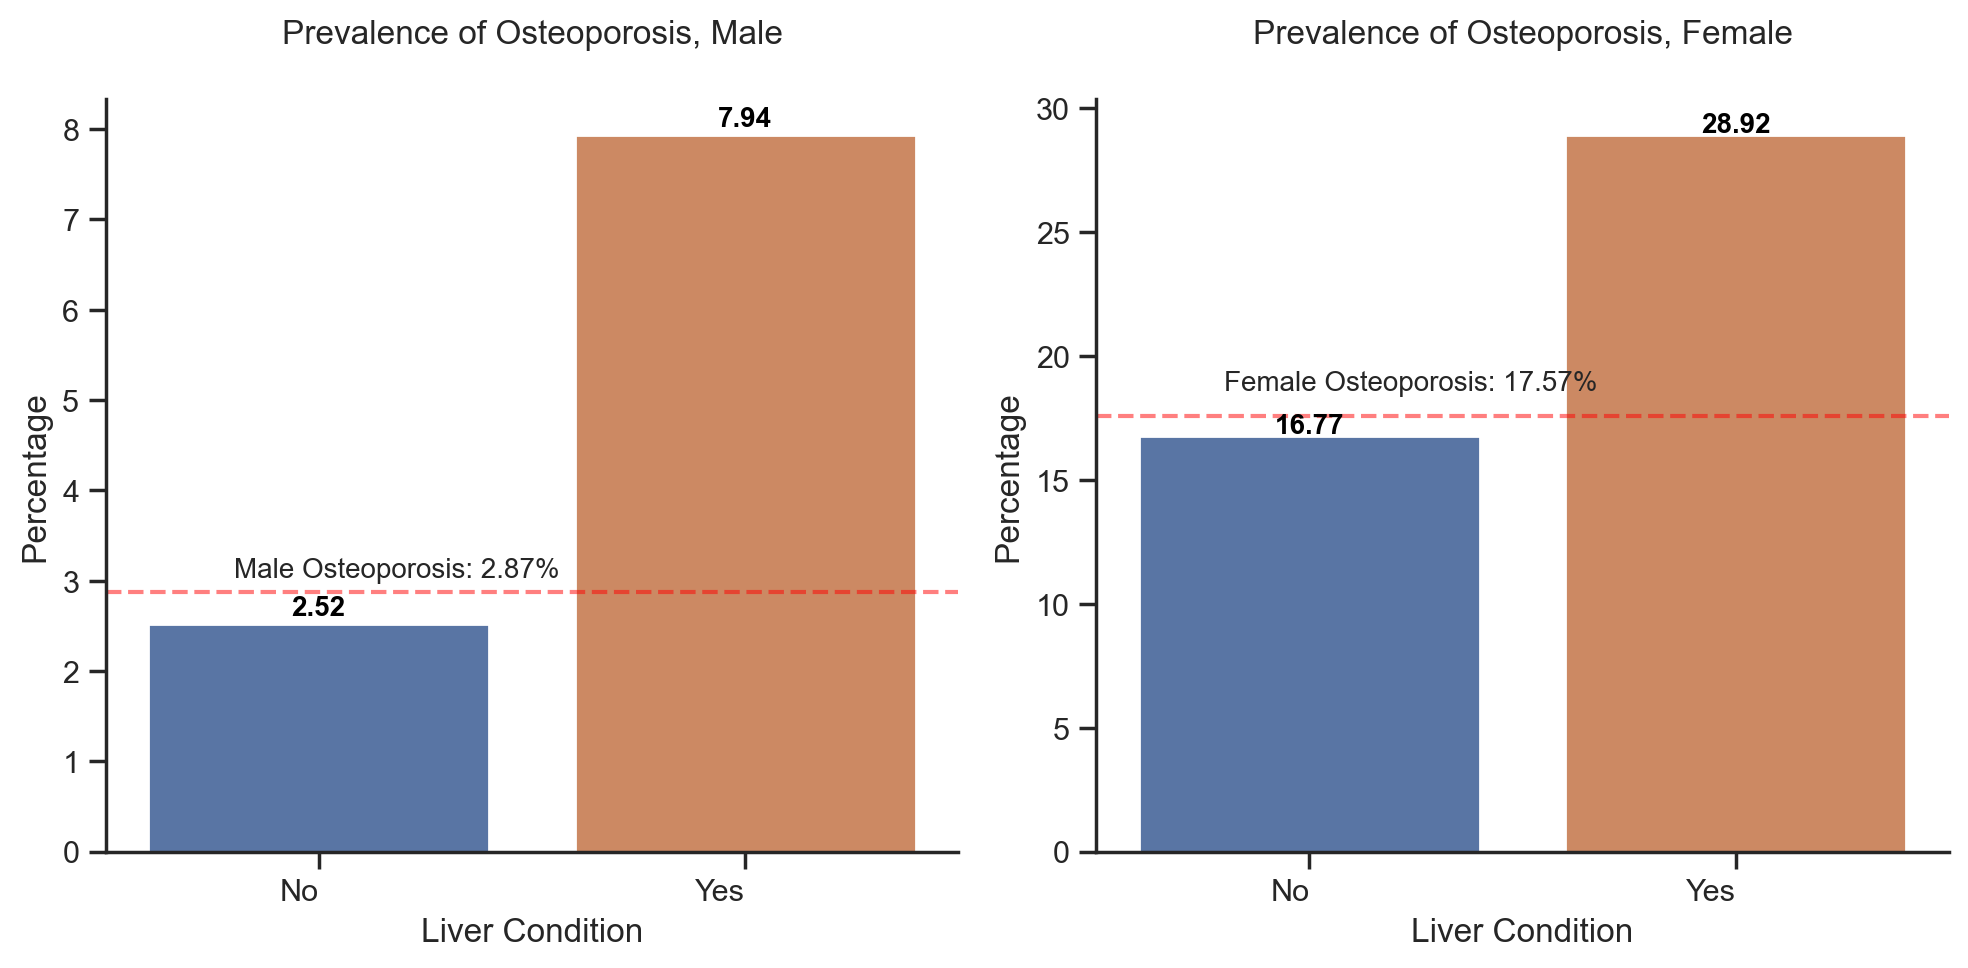

In [60]:
plt.figure(figsize=(10, 5))
plot_both_gender(data=df_merged, 
                 var_col='Liver Condition', 
                 target_col='Osteoporosis', 
                 text_male=oste_pcnt_male,
                 text_female=oste_pcnt_female, 
                 annotate_x_male=-0.2,
                 annotate_x_female=-0.2,
                 annotate_y_male=oste_pcnt_male,
                 annotate_y_female=oste_pcnt_female,
                 x_tick_rotation=0
                )

#### 6.10.2 95% Confidence Interval for Male

In [61]:
# with liver condition vs. no liver condition for male
df_grouped = gender_groupby(data=df_merged, gender='Male', 
                            var_col='Liver Condition', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='Yes', group2_name='No')
print(
f"""
95% confidence interval of relative risk (with liver condition vs. no liver condition) \
for male:\n {ci_95}
""")


95% confidence interval of relative risk (with liver condition vs. no liver condition) for male:
 [1.90066252 5.21648299]



The entire interval is greater than 1, so it's statistically significant.

#### 6.10.3 95% Confidence Interval for Female

In [62]:
# with liver condition vs. no liver condition for female
df_grouped = gender_groupby(data=df_merged, gender='Female', 
                            var_col='Liver Condition', 
                            target_col='Osteoporosis')
ci_95 = get_rr_ci(df_grouped, group1_name='Yes', group2_name='No')
print(
f"""
95% confidence interval of relative risk (with liver condition vs. no liver condition) \
for female:\n {ci_95}
""")


95% confidence interval of relative risk (with liver condition vs. no liver condition) for female:
 [1.3704173  2.17033192]



The entire interval is greater than 1, so it's statistically significant.

In summary, for both men and women, those with liver condition had higher risk of osteoporosis when compared to those without.

## 7. Feature Engineering

### 7.1 One-Hot Encoding

Before applying any machine learning algorithm, we need to convert categorical variables into numbers.

In [63]:
cate_list = list(df_merged.select_dtypes(include=['category', 'object']).columns)
df_ohe = pd.get_dummies(df_merged, columns=cate_list, prefix_sep='_')
# drop columns end with '_No'
df_ohe = df_ohe[df_ohe.columns.drop(list(df_ohe.filter(regex='_No$')))]
# remove '_Yes', 'Gender_', and 'Race_' from column names
df_ohe.columns = df_ohe.columns.str.replace("_Yes|Gender_|Race_", "")
# drop redundant columns to reduce the impact of multicollinearity
df_ohe = df_ohe.drop(columns=['Male', 
                              'Other Race - Including Multi-Racial',
                             ])

df_ohe.head()

,Age,BMI,Sleep Hours,Female,Mexican American,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Smoking,Heavy Drinking,Arthritis,Liver Condition,Osteoporosis
0,69.0,26.7,7.0,0,0,0,1,0,0,1,1,1,0,0
1,54.0,28.6,9.0,0,0,0,0,1,0,1,1,0,0,0
2,72.0,28.9,8.0,0,0,0,0,1,0,1,0,0,0,1
3,73.0,19.7,9.0,1,0,0,0,1,0,0,0,1,0,0
4,56.0,41.7,5.0,0,1,0,0,0,0,1,0,1,0,0


### 7.2 Correlation Matrix

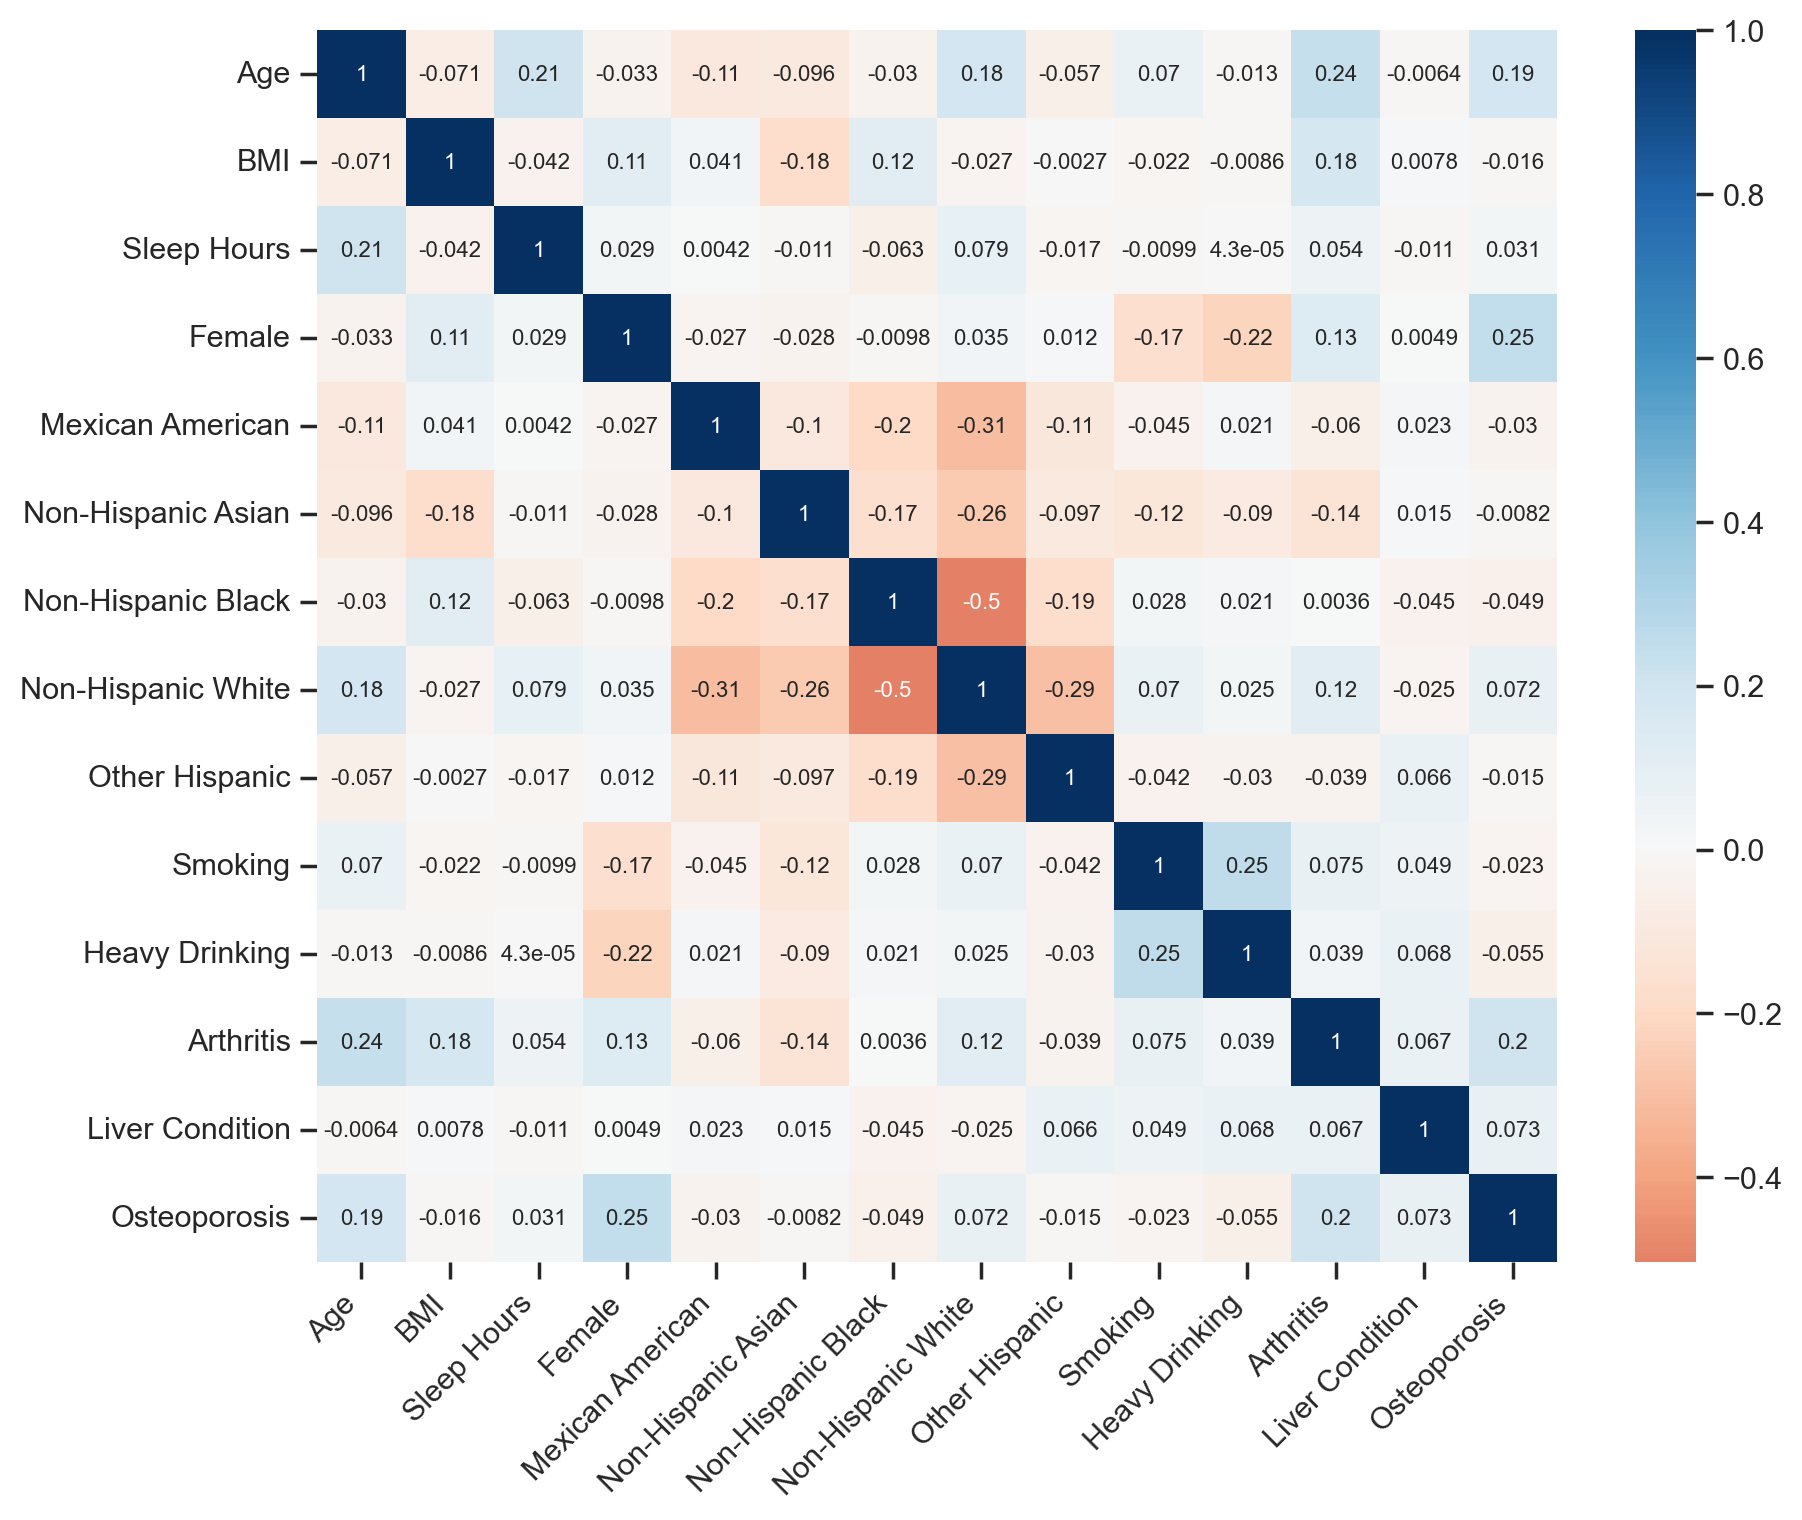

In [64]:
plt.figure(figsize=(10, 8))
chart = sns.heatmap(data=df_ohe.corr(), annot=True, annot_kws={"fontsize":8}, center=0, cmap="RdBu")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

According to the heatmap, "Age", "Female", and "Arthritis" might be weakly associated with osteoporosis, which in line with what we've observed in EDA.

## 8. Prepare Training and Testing Dataset

### 8.1 Oversampling or Not

We've known the dataset is very imbalanced (with Osteoporosis: 9.9%). The problem of imbalanced data is that most machine learning might ignore the minority class and get poor performance on it. One of the solution is to oversample the minority class to make it same size as the majority class. Synthetic Minority Oversampling Technique (SMOTE, refer this [paper](https://arxiv.org/abs/1106.1813)) is one of the most popular oversampling method. It uses a k-nearest neighbor algorithm to create synthetic data points for the minority class.

No matter with or without oversampling, the next step is to standardize the dataset, because many machine learning algorithms work better when the data is or approximately normally distributed. However, this dataset contains variables, such as `Age` and `Sleep Hours`, that are not normally distributed. To fix that, we can use Sklearn `StandardScaler` to tranform the data. In addition, to avoid data leakage, we will need to split training and testing dataset first, and then apply the mean and standard deviation of X_train to X_test.

Let's compare the performance of SMOTE vs no SMOTE by logistic regression.

**No SMOTE**

In [65]:
# split X, y
X = df_ohe.copy()
y = X.pop('Osteoporosis')

# standardization
(
    X_train_no,
    X_test_no,
    y_train_no,
    y_test_no,
    X_train_ss_no,
    X_test_ss_no,
) = train_test_standardscaler(
    X, y, test_size=0.2, random_state=42
)

**SMOTE**

In [66]:
# use SMOTE to oversample the minority class
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# standardization
(
    X_train,
    X_test,
    y_train,
    y_test,
    X_train_ss,
    X_test_ss,
) = train_test_standardscaler(
    X, y, test_size=0.2, random_state=42
)

In [67]:
# double check the corresponding dimensions
print('====== No SMOTE ========\n')
print(f'the shape of X_train is: {X_train_ss_no.shape}')
print(f'the shape of X_test is: {X_test_ss_no.shape}')
print(f'the shape of y_train is: {y_train_no.shape}')
print(f'the shape of y_test is: {y_test_no.shape}')

print('\n====== With SMOTE ========\n')
print(f'the shape of X_train is: {X_train_ss.shape}')
print(f'the shape of X_test is: {X_test_ss.shape}')
print(f'the shape of y_train is: {y_train.shape}')
print(f'the shape of y_test is: {y_test.shape}')

====== No SMOTE ========

the shape of X_train is: (5194, 13)
the shape of X_test is: (1299, 13)
the shape of y_train is: (5194,)
the shape of y_test is: (1299,)

====== With SMOTE ========

the shape of X_train is: (9360, 13)
the shape of X_test is: (2340, 13)
the shape of y_train is: (9360,)
the shape of y_test is: (2340,)


Now training data and testing data account for 80% and 20% of the entire group respectively, and both have been standardized.
Next, let's start to train models.

### 8.2 SMOTE vs. No SMOTE by Logistic Regression

#### 8.2.1 Training and Prediction

In [68]:
# ==== No SMOTE =====
lr_model_no = LogisticRegression()
# train the model
lr_model_no.fit(X_train_ss_no, y_train_no)
# predict test result
y_test_predict_no = lr_model_no.predict(X_test_ss_no)

# ==== SMOTE =====
lr_model = LogisticRegression()
# train the model
lr_model.fit(X_train_ss, y_train)
# predict test result
y_test_predict = lr_model.predict(X_test_ss)

#### 8.2.2 Confusion Matrix

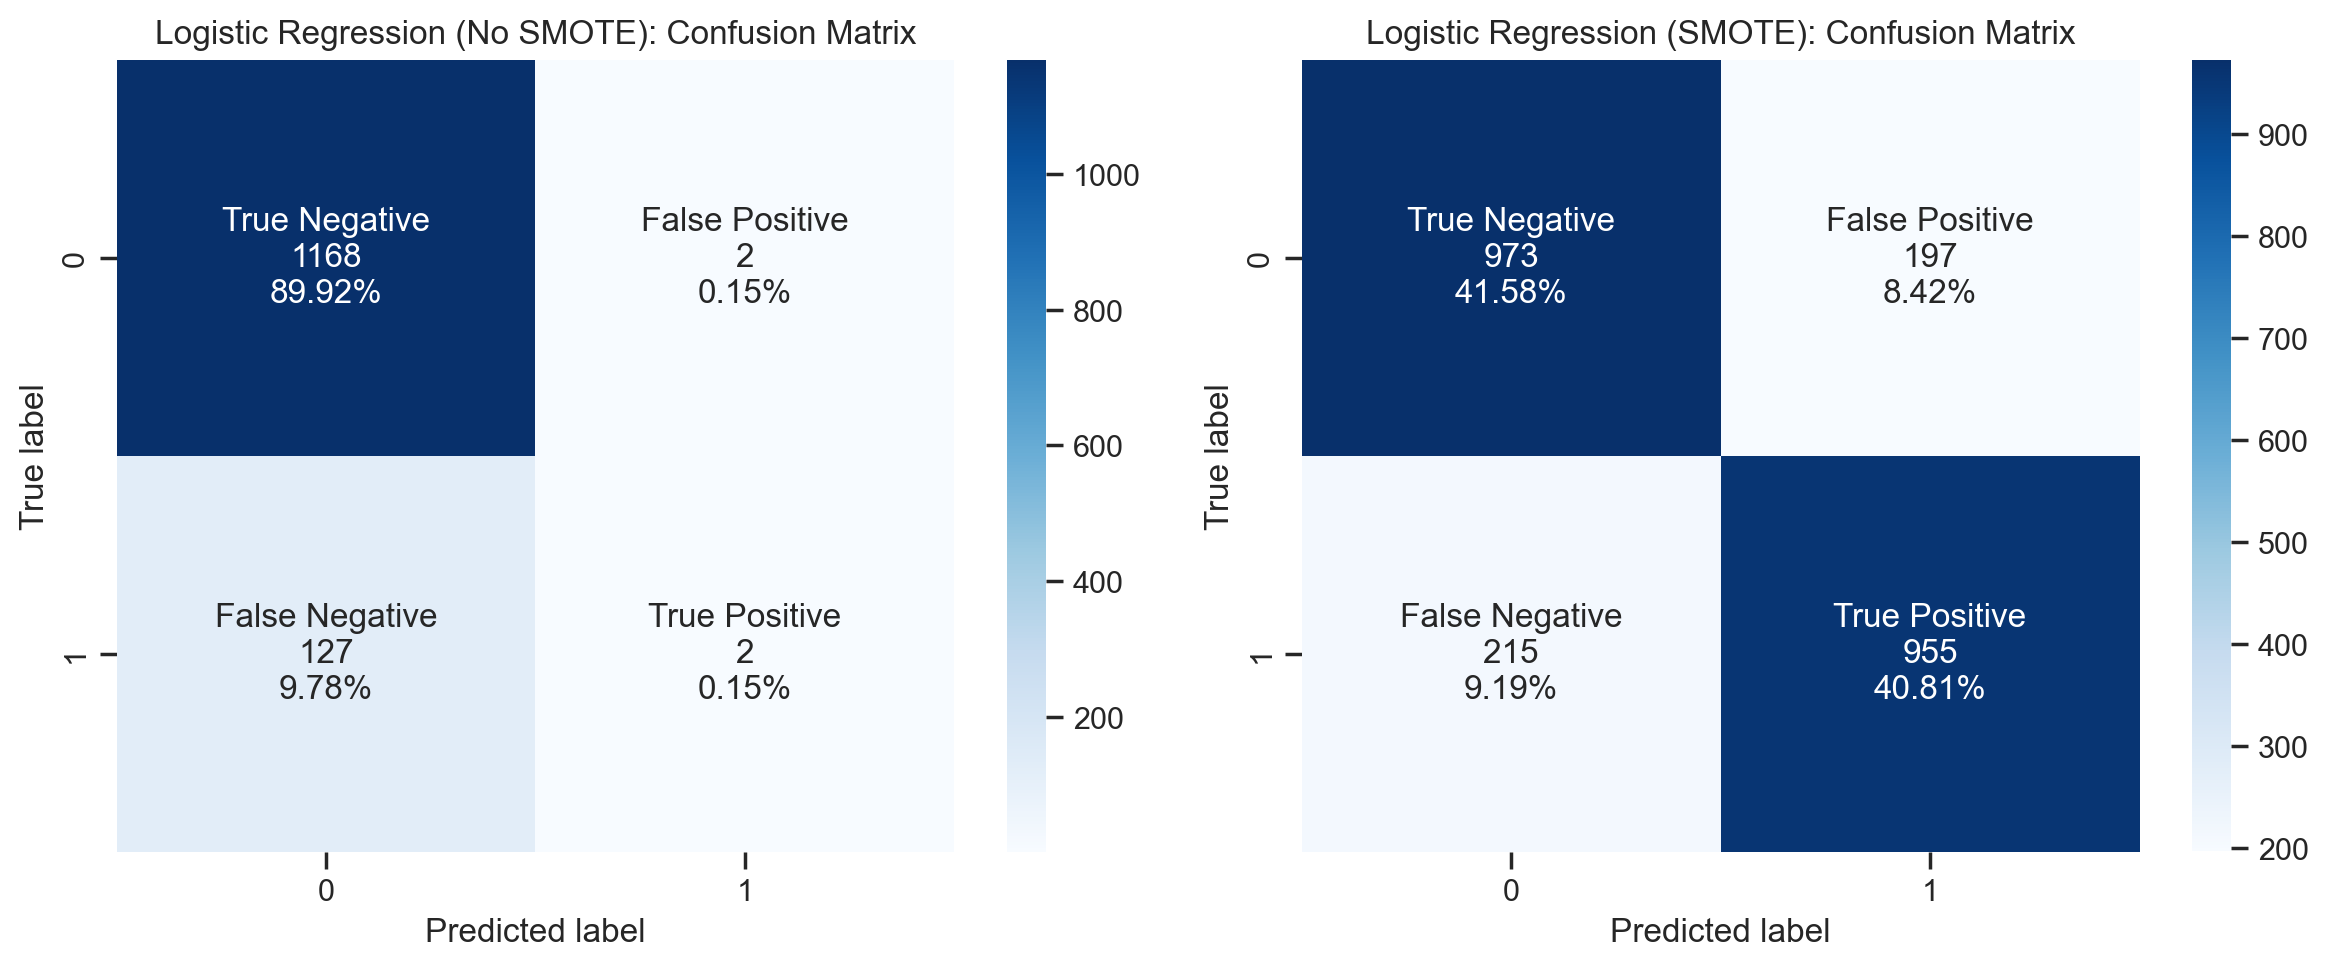

In [69]:
# No SMOTE: confusion matrix
lr_cf_matrix_no = confusion_matrix(y_test_no, y_test_predict_no)

# SMOTE: confusion matrix
lr_cf_matrix = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_cf_matrix(lr_cf_matrix_no, model_name="Logistic Regression (No SMOTE)")
plt.subplot(122)
plot_cf_matrix(lr_cf_matrix, model_name="Logistic Regression (SMOTE)")
plt.tight_layout()

#### 8.2.3 AUC

No Skill: ROC AUC=0.5
Logistic Regression (No SMOTE): ROC AUC=0.823
Logistic Regression (SMOTE): ROC AUC=0.905


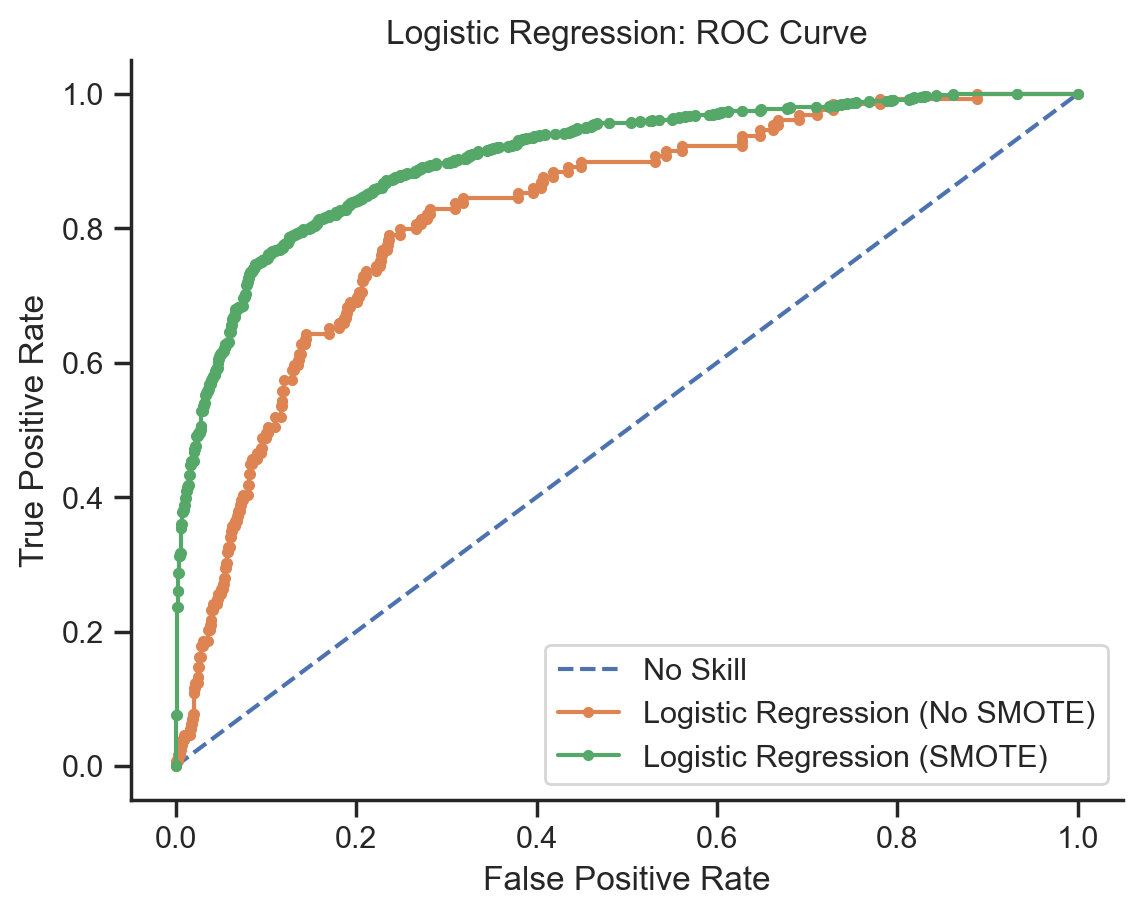

In [70]:
y_test_predict_probs_no = get_predict_proba(lr_model_no, X_test_ss_no)
lr_auc_no, lr_roc_plot_no = plot_auc(y_test_no, 
                                     y_test_predict_probs_no, 
                                     model_name="Logistic Regression (No SMOTE)")
y_test_predict_probs = get_predict_proba(lr_model, X_test_ss)
lr_auc, lr_roc_plot = plot_auc(y_test, 
                               y_test_predict_probs, 
                               display_no_skill=False,
                               model_name="Logistic Regression (SMOTE)",
                               title="Logistic Regression: ROC Curve")

**Performance Scores**

In [71]:
# precision, accuracy, f1-score, and AUC
lr_model_scores_no = binary_classification_scores(lr_cf_matrix_no, 
                                                  auc=lr_auc_no, 
                                                  model_name='Logistic Regression (No SMOTE)')
lr_model_scores = binary_classification_scores(lr_cf_matrix, 
                                               auc=lr_auc,
                                               model_name='Logistic Regression (SMOTE)')
lr_scores = pd.concat([lr_model_scores_no, lr_model_scores])
lr_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Logistic Regression (No SMOTE),0.901,0.500,0.016,0.030,0.823
Logistic Regression (SMOTE),0.824,0.829,0.816,0.823,0.905


We can see obvious improvement in Precision, Recall, and F1 Score after SMOTE, which proves SMOTE is an efficent way for handling imbalanced data. We can keep using the train and test data after SMOTE to train other models.

## 9. Support Vector Machine

### 9.1 Optimal Parameters with GridSearchCV

First of all, let's optimize the SVM model by finding the best value for the following parameters:
- **C**: Default is 1. The strength of the regularization is inversely proportional to C. Larger C usually leads to less classification.
- **gamma**: Gamma parameter of RBF (the default kernel) controls the distance of the influence of a single training point. High gamma means only nearby points are considered when calculating the distance.

In [ ]:
num_features = X_train_ss.shape[1]
param_grid = [
  {'C': [1, 10, 100], 
   'gamma': [1/num_features, 1, 0.1, 0.01], 
  }
]
# get optimal params with GridSearchCV
optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0
    )

optimal_params.fit(X_train_ss, y_train)

# set optimal params
svm_model = SVC(C=optimal_params.best_params_['C'],
                gamma=optimal_params.best_params_['gamma'],
                probability=True,
                random_state=42)
# train
svm_model.fit(X_train_ss, y_train)

### 9.2 Model Evaluation

**Confusion Matrix**

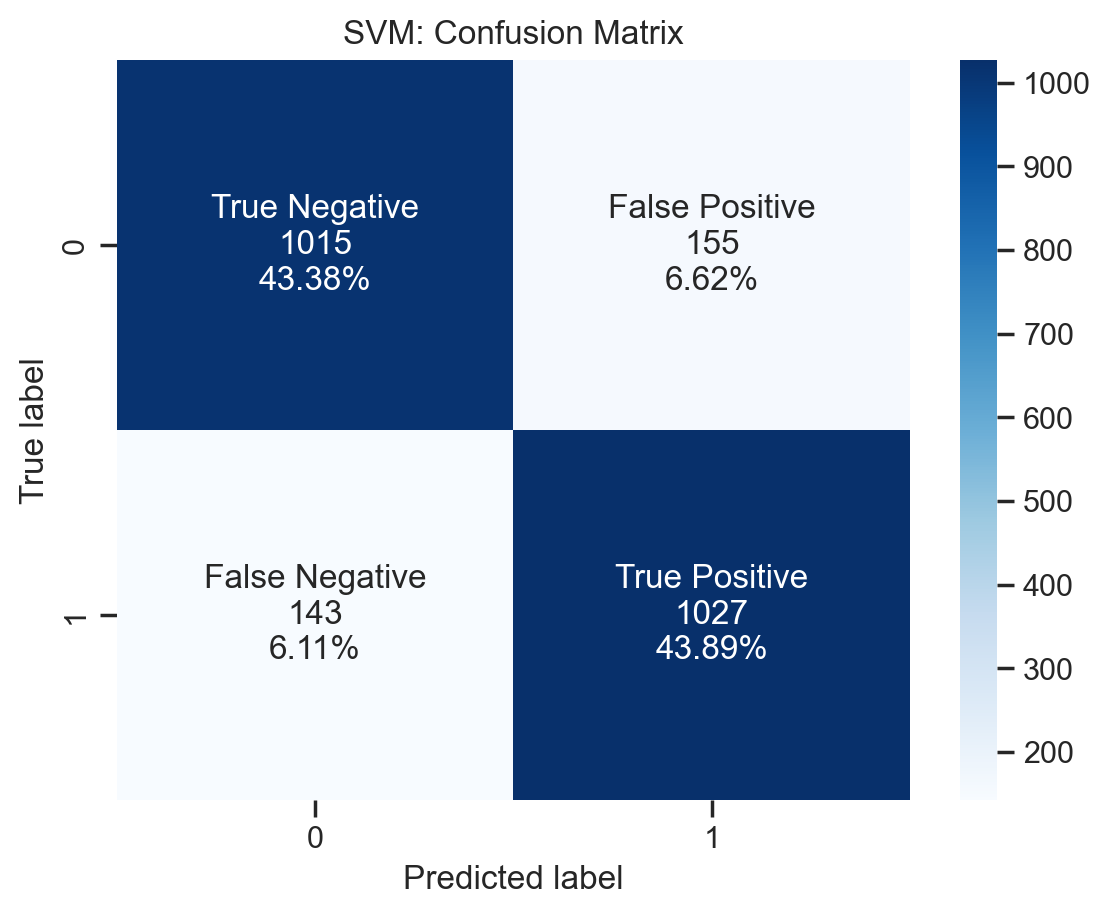

In [73]:
y_test_predict_svm = svm_model.predict(X_test_ss)
svm_cf_matrix = confusion_matrix(y_test, y_test_predict_svm)
plot_cf_matrix(svm_cf_matrix, model_name="SVM")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
SVM: ROC AUC=0.92


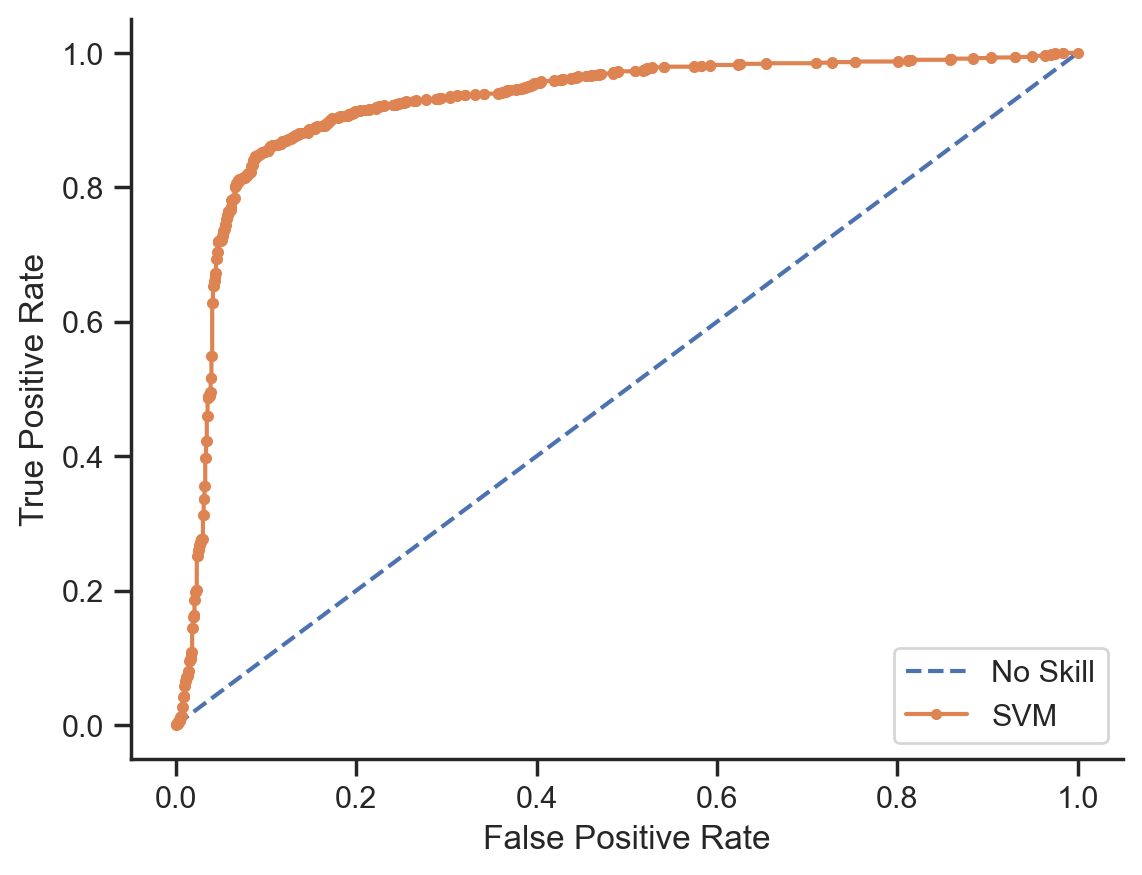

In [74]:
y_test_predict_probs_svm = get_predict_proba(svm_model, X_test_ss)
svm_auc, svm_roc_plot = plot_auc(y_test, y_test_predict_probs_svm, model_name="SVM")

**Performance Scores**

In [75]:
# precision, accuracy, f1-score, and AUC
svm_model_scores = binary_classification_scores(svm_cf_matrix, 
                                                auc=svm_auc, 
                                                model_name='SVM')
svm_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
SVM,0.873,0.869,0.878,0.873,0.92


## 10. Neural Networks

### 10.1 Train the Model

In [76]:
tf.random.set_seed(42)
nn_model = Sequential(
    [      
        # the input, layer 0
        tf.keras.Input(shape=(13,)),
        # layers
        Dense(units=8, name="l1", activation="relu"),
        Dense(units=4, name="l2", activation="relu"),
        Dense(units=1, name="l3", activation="linear")
    ], name = "nn_model" 
)
nn_model.summary()

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 8)                 112       
                                                                 
 l2 (Dense)                  (None, 4)                 36        
                                                                 
 l3 (Dense)                  (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


2023-02-19 15:13:33.473603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [77]:
nn_model.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True, alpha=0.5, gamma=2),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

history = nn_model.fit(X_train_ss, y_train, epochs=80, batch_size=20, validation_split=0.2)

Epoch 1/80
375/375 [==============================] - 1s 2ms/step - loss: 0.5048 - val_loss: 0.4123
Epoch 2/80
375/375 [==============================] - 1s 2ms/step - loss: 0.3479 - val_loss: 0.2897
Epoch 3/80
375/375 [==============================] - 1s 2ms/step - loss: 0.2521 - val_loss: 0.2198
Epoch 4/80
375/375 [==============================] - 1s 2ms/step - loss: 0.2004 - val_loss: 0.1850
Epoch 5/80
375/375 [==============================] - 1s 1ms/step - loss: 0.1747 - val_loss: 0.1684
Epoch 6/80
375/375 [==============================] - 1s 2ms/step - loss: 0.1620 - val_loss: 0.1597
Epoch 7/80
375/375 [==============================] - 1s 2ms/step - loss: 0.1545 - val_loss: 0.1540
Epoch 8/80
375/375 [==============================] - 1s 2ms/step - loss: 0.1490 - val_loss: 0.1494
Epoch 9/80
375/375 [==============================] - 1s 2ms/step - loss: 0.1445 - val_loss: 0.1452
Epoch 10/80
375/375 [==============================] - 1s 2ms/step - loss: 0.1404 - val_loss: 0.1413

### 10.2 Loss Curves

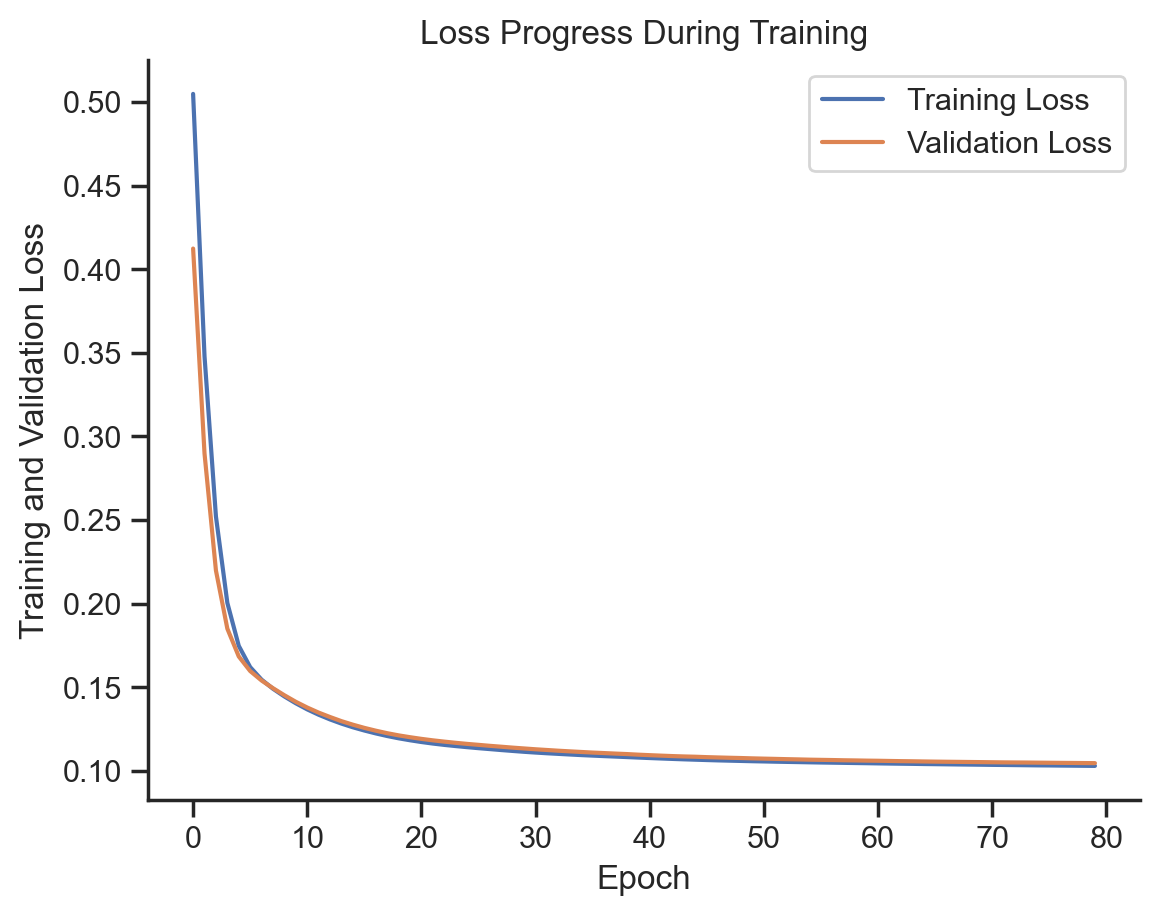

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The two loss curves are very close to each other, the neural networks model looks good.

### 10.3 Prediction

In [79]:
y_predict_nn_logit = nn_model.predict(X_test_ss)
# after sigmoid we get the probabilies to be 1
y_predict_nn_prod = tf.nn.sigmoid(y_predict_nn_logit)
# the predicted label will be 1 only when the probability >= 0.5
y_predict_nn = tf.round(y_predict_nn_prod)

74/74 [==============================] - 0s 839us/step


### 10.4 Model Evaluation
**Confusion Matrix**

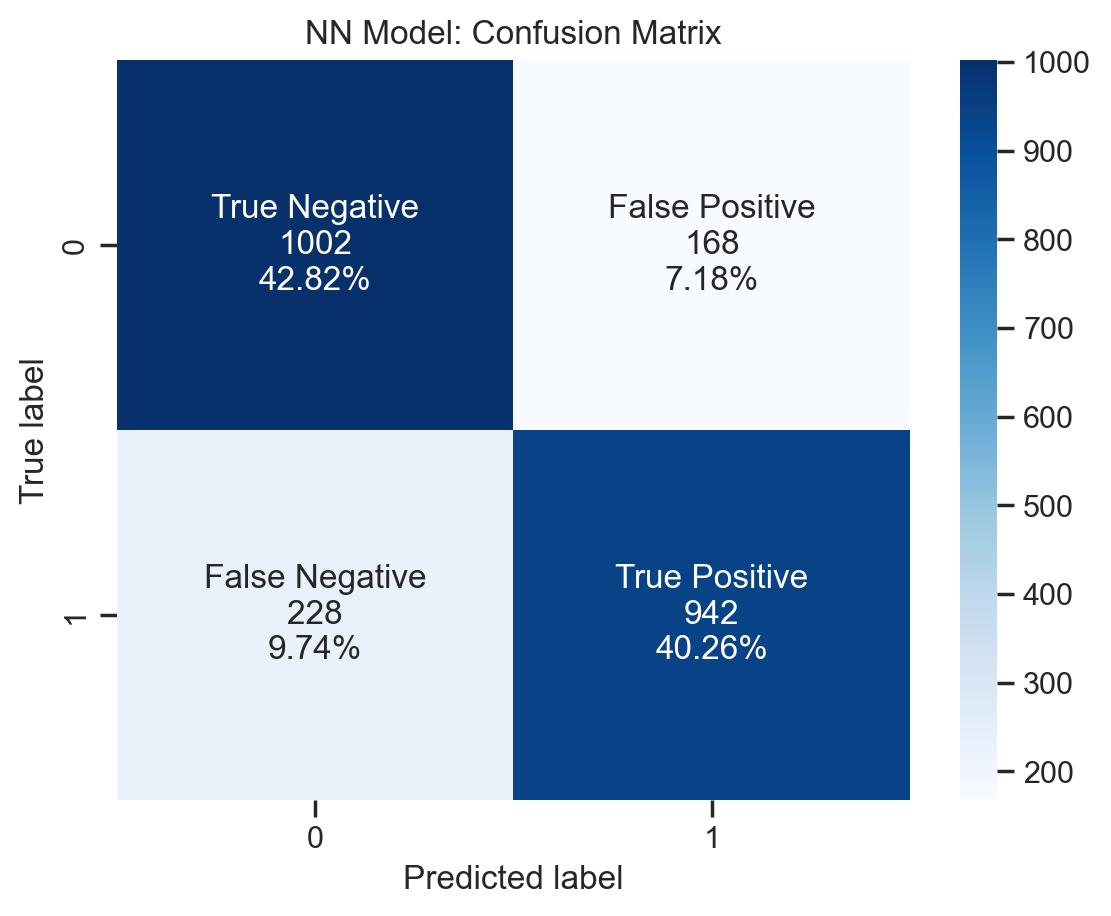

In [80]:
nn_cf_matrix = confusion_matrix(y_test, y_predict_nn)
plot_cf_matrix(nn_cf_matrix, 'NN Model')
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Neural Networks: ROC AUC=0.911


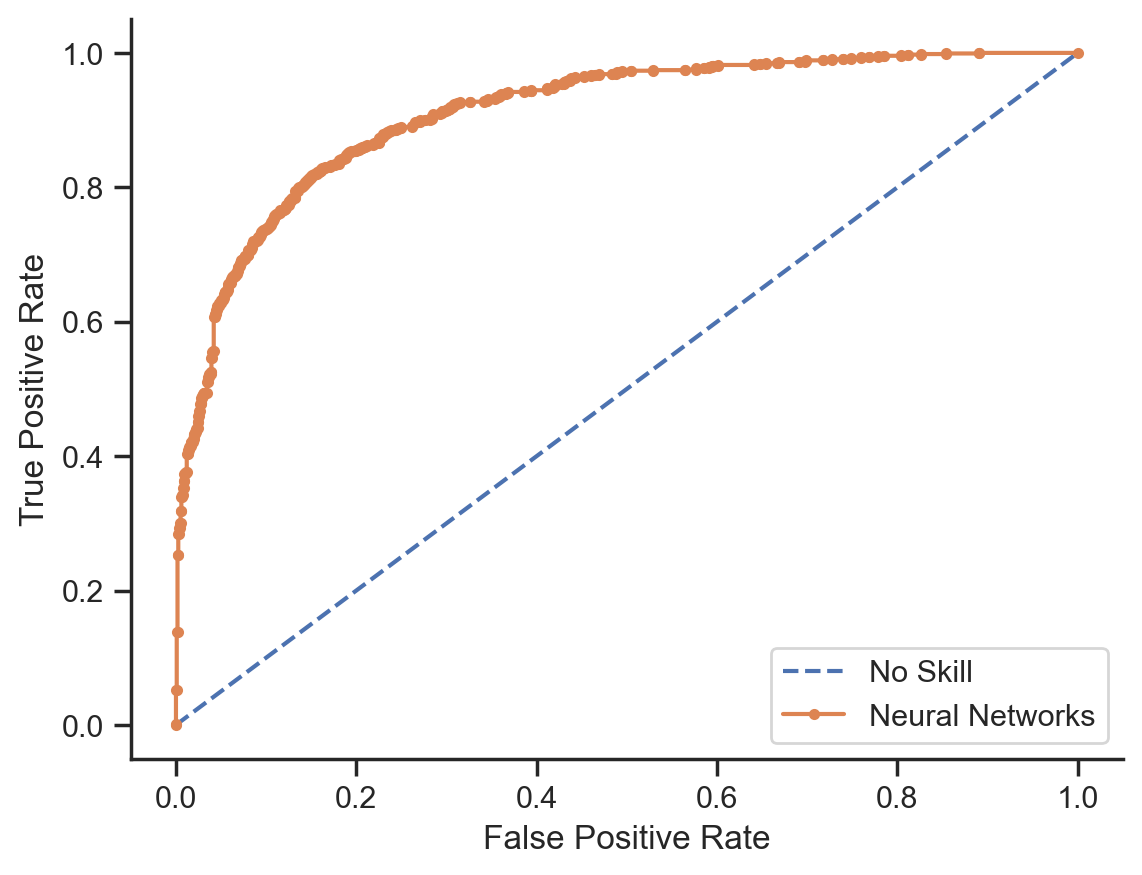

In [81]:
nn_auc, nn_roc_plot = plot_auc(y_test, y_predict_nn_prod, model_name="Neural Networks")

**Performance Scores**

In [82]:
# precision, accuracy, f1-score, and AUC
nn_model_scores = binary_classification_scores(nn_cf_matrix, auc=nn_auc, 
                                               model_name='Neural Networks')
nn_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Neural Networks,0.831,0.849,0.805,0.826,0.911


## 11. XGBoost

### 11.1 Optimal Parameters with GridSearchCV

First of all, let's optimize the XGBoost model by finding the best value for the following parameters:
- **gamma**: Default is 0. The larger gamma is, the more conservative the algorithm will be.
- **max_depth**: Default is 6. Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
- **subsample**: Default is 1. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.

In [83]:
param_grid = [
  {'gamma': [0, 1, 2], 
   'max_depth': [4, 5, 6],
   'subsample': [0.5, 0.75, 1], 
  }
]
# get optimal params with GridSearchCV
optimal_params = GridSearchCV(
        XGBClassifier(objective='binary:logistic'), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0
    )

optimal_params.fit(X_train_ss, y_train)

# set optimal params
xg_model = XGBClassifier(gamma=optimal_params.best_params_['gamma'],
                         max_depth=optimal_params.best_params_['max_depth'],
                         subsample=optimal_params.best_params_['subsample'],
                         objective='binary:logistic',
                         random_state=42)
# train
xg_model.fit(X_train_ss, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [84]:
optimal_params.best_params_

{'gamma': 0, 'max_depth': 6, 'subsample': 1}

Default parameters are the optimal.

### 11.2 Model Evaluation

**Confusion Matrix**

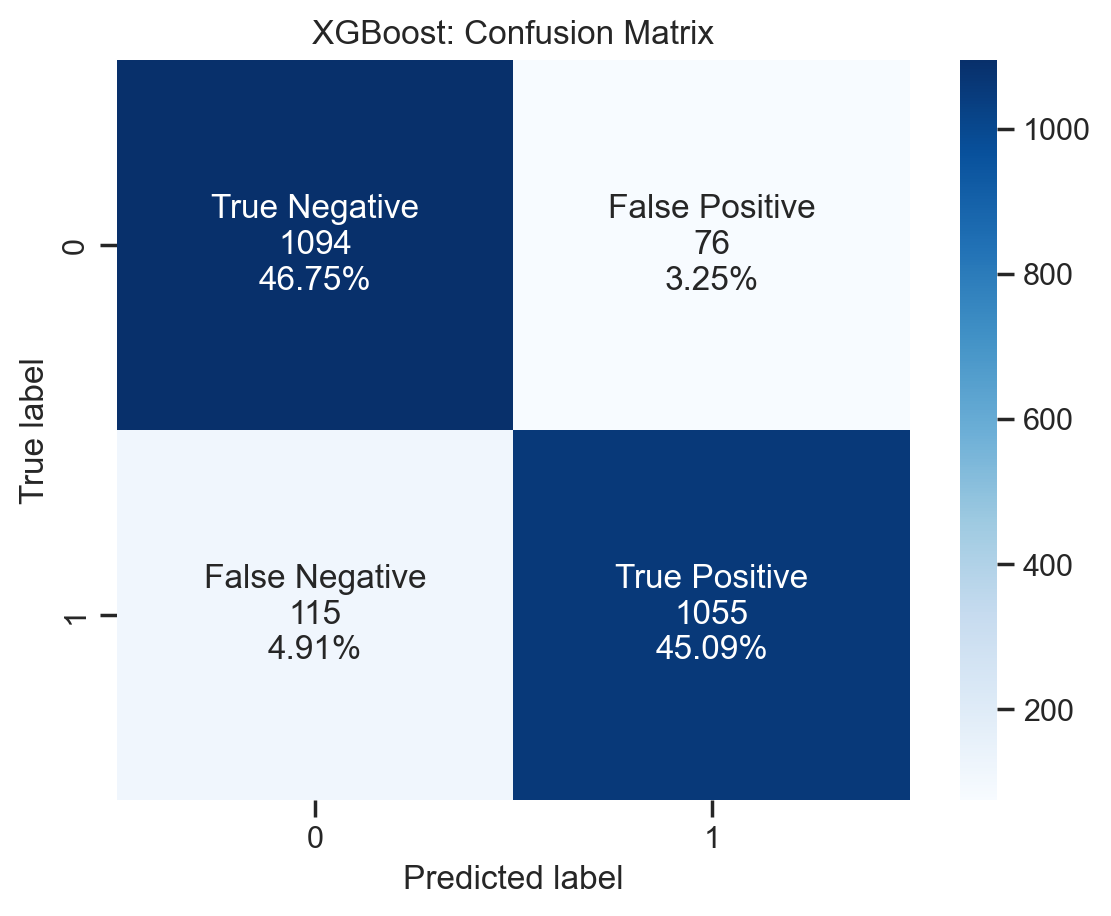

In [85]:
y_test_predict_xg = xg_model.predict(X_test_ss)
xg_cf_matrix = confusion_matrix(y_test, y_test_predict_xg)
plot_cf_matrix(xg_cf_matrix, model_name="XGBoost")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
XGBoost: ROC AUC=0.979


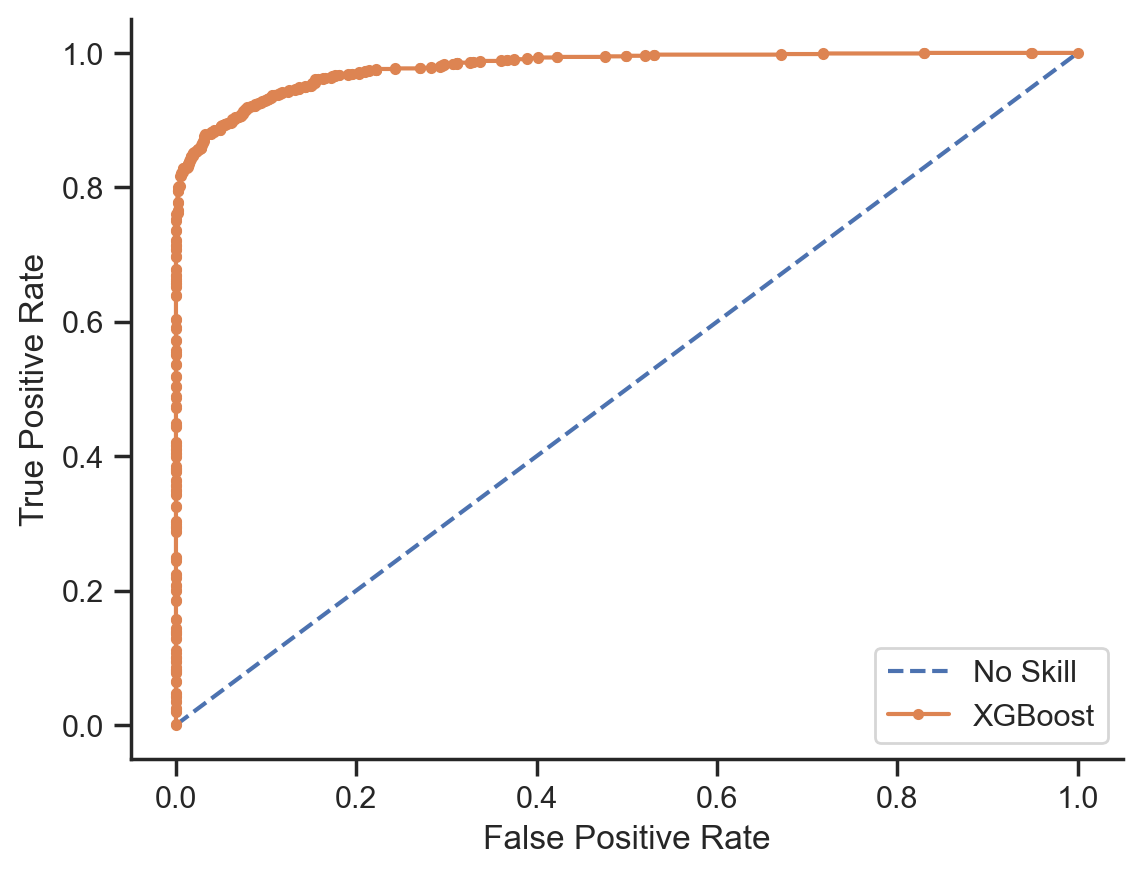

In [86]:
y_test_predict_probs_xg = get_predict_proba(xg_model, X_test_ss)
xg_auc, xg_roc_plot = plot_auc(y_test, y_test_predict_probs_xg, model_name="XGBoost")

**Performance Scores**

In [87]:
# precision, accuracy, f1-score, and AUC
xg_model_scores = binary_classification_scores(xg_cf_matrix,
                                               auc=xg_auc,
                                               model_name='XGBoost')
xg_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
XGBoost,0.918,0.933,0.902,0.917,0.979


## 12. Model Comparison

In [88]:
combined = pd.concat([lr_scores.loc[['Logistic Regression (SMOTE)']], 
                      svm_model_scores, nn_model_scores, xg_model_scores])
combined.sort_values(by=['AUC'], ascending=False)

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
XGBoost,0.918,0.933,0.902,0.917,0.979
SVM,0.873,0.869,0.878,0.873,0.920
Neural Networks,0.831,0.849,0.805,0.826,0.911
Logistic Regression (SMOTE),0.824,0.829,0.816,0.823,0.905


In this project, XGBoost performs best in all aspects, with a sensitivity (recall) 91.6%, a precision of 93.6%, f1 score 0.925 and a measured AUC of 0.979.